# Notebook for sensitivity analyses

In [1]:
## import packages
## We need to add the module path to our system path so 
## so that our notebook can find our local objects and code:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
     
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from math import exp
import seaborn as sns
import sys
import glob
from dateutil.relativedelta import *
from numpy.random import exponential, uniform
import scipy.stats as st
from statistics import mean 

# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel
from farm.functions import *
from farm.climate import make_climate_parameters, check_exponential, Climate

# set background color
plot.rc['figure.facecolor'] = 'white'
plot.rc.axesfacecolor = 'white'

In [2]:
# import the simulations

n_sim = 10000
no_sims = np.arange(0,n_sim)

files = glob.glob('../output/revisions/sims.3.23.21/*.csv')


output = []
for f, n in zip(files, no_sims):
    f_ = pd.read_csv(f).drop('Unnamed: 0',axis=1)
    output.append(f_)
    
    

In [3]:
station = 'OL JOGI FARM'
interval = 'dekad'
data_file = module_path + '/data/CETRAD/CETRAD_rainfall.csv'
texture='clay loam'
pd_sim = 60

a_mid, l_mid, sd = make_climate_parameters(data_file = data_file, station=station, interval=interval) 

climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        do_std=False) # This should be false, always
        
soil = Soil('clay loam')
crop = Crop(soil=soil)
soil.set_nZr(crop)  
model = CropModel(crop=crop,soil=soil,climate=climate)

model.run()

Laikipia station data was inputted.


## 1.15 

Do these selected values for the crop coefficient in Eq 5 matter for your results? How so and how much? Just wondering if the different varietals really change these, and whether your results are particularly sensitive to that.


Here is equation 5:

2.2.1.3 Seasonal variation in the Crop coefficient

The growing season is divided into four stages of crop phenology, through which the crop coefficient varies, peaking in mid-season after the reproductive stage. The crop coefficient is determined as

In [73]:
%%latex
\begin{equation}
\label{eq:Kc}
    K_c(t) = \begin{cases}
        K_{c,\text{ini}}
            &   t \leq f_\text{i} \\[6pt]
            
        \frac{K_{c,\text{max}}-K_{c,\text{ini}}}{f_\text{d} - f_\text{i}} (t- f_\text{i}) + K_{c,\text{ini}}
            &   f_\text{i} < t \leq f_\text{d}   \\[6pt]
            
        K_{c,\text{max}}
            &   f_\text{d}  < t \leq f_\text{ms}   \\[6pt]
            
        \frac{K_{c, \text{eos}}-K_{c,\text{max}}} {f_\text{ls} - f_\text{ms}}  (t- f_\text{ms}) + K_{c,\text{max}}
            &   f_\text{ms} < t < f_\text{ls}  \\[6pt]

        K_{c,\text{eos}}
            &   t = f_\text{ls}
    \end{cases}
\end{equation}


where $f_\text{i}$, $f_\text{d}$, $f_\text{ms}$, and $f_{\text{ls}}$ denote the time in days from the beginning of the growing season to the vegetative period (initial), reproductive period (development), maturity period (mid-season), and end of season (late season), respectively. The values of $K_c$ during vegetative and ripening periods are constant functions of time and the values of $K_c$ during reproductive and senescence stages are linearly interpolated between the values for the start and end of each period. We use crop coefficient ($K_c$) values based on those listed in FAO guidelines for 180-day maize (grain) in high altitude East Africa, which are defined as 0.3, 0.3, 1.2, 1.2, and 0.6 and correspond to 0\%, 16\%, 44\%, 76\% and 100\% of the growing season \cite{allen1998chapter}. We selected this metric for $K_c$ because it is widely used in the Crop Water Requirement Satisfaction Index (WRSI) \cite{senay2004crop} when locally appropriate values are absent. % the initial, mid-season, and end of season, respectively. 
%\citeA{allen1998chapter} provides crop development stages for a 180-day variety, which we use in our calculation of crop coefficient: $L_{\text{ini}=30}$, $L_{\text{dev}}$ = 50, $L_{\text{mid}}$ = 60, $L_{\text{late}}$ = 40. 

<IPython.core.display.Latex object>

In [75]:
# def _calc_kc(day_of_season=0, KC_MAX=1.2, LAI_MAX=3.0, T_MAX=4, lgp = 180, F1 = 0.16, F2 = 0.44, F3 = 0.76, 
#                  EOS = 1.0, KC_INI = 0.30, KC_EOS = 0.6):
#         """ Calculates crop coefficient that varies throughout the season 
        
#         Usage: calc_kc(self, day_of_season)
            
#             day_of_season = 0 # Start date [day]

#         Note: t must be a single-dimension array. day_of_season is when the plant starts
#         to grow and is hard coded to zero because python is zero-indexed.
#         Kc values come from Table 11. Lengths of crop development stages for 
#         maize (grain) in East Africa (altitude), Chapter 6 in FAO (1998).

#         """
#         if not day_of_season >= 0:
#             raise ValueError ("day_of_season must be >= 0")
#         if day_of_season <= lgp*F1:
#             return KC_INI
#         elif day_of_season < lgp*F2:
#             return ((KC_MAX-KC_INI)/(F2*lgp-F1*lgp))*(day_of_season-F1*lgp)+KC_INI
#         elif day_of_season <= lgp*F3:
#             return KC_MAX
#         elif day_of_season < lgp*EOS:
#             return ((KC_EOS-KC_MAX)/(EOS*lgp-F3*lgp))*(day_of_season-F3*lgp)+KC_MAX
#         else:
#             return KC_EOS

In [79]:
# lgp=180
# Crop(soil=soil, lgp=lgp, F1=0.2)

In [ ]:
# Then we call on calc_kc with this function

def kc_runs(alpha_r = None, lambda_r = None, n_sim = 1000,  burn_in = 60,  station = 'OL JOGI FARM', data_file = module_path + '/data/CETRAD/CETRAD_rainfall.csv',
    texture = 'clay loam', lgp=180, pd_sim=60, interval='dekad', do_std=True): 
    """ Run simulations for a specific climate, soil, and crop.

    Usage: total_rf_corr(n_sim, pd_ic, station, texture, lgp, pd_sim)
           
    Default values:
        n_sim = 500 # Number of Simulations to Remove Initial Conditions [integer]
        pd_ic = 1 # Planting Date for Initial Conditions [Julian day]
        station = 'OL JOGI FARM' # Climatology [string]
        texture = 'clay' # Soil Type [string]
        lgp = 180 # Length of Growing Period [Days]
        pd_sim 100 # Planting Date for Simulation [Julian day]

    """
    # Part 1. Set conditions for IC runs
    n_sim = n_sim # change back to 1000 later
    planting_date = pd_sim 

    # Part 2. Initialize model with a climate, soil and crop
    climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        do_std=False) # This should be false, always
    soil = Soil(texture=texture)
    
    # Mess with Crop object 
    # orig: F1 = 0.16, F2 = 0.44, F3 = 0.76
    result = []
    #rs = [0.05, 0.2, 0.4, 0.6, 0.8, 1.1]
    crop = Crop(soil=soil, lgp=lgp, KC_INI=0.7, KC_MAX=0.7, KC_EOS=0.7)
    
    soil.set_nZr(crop)

    model = CropModel(crop=crop, climate=climate, soil=soil)
    model.run()
    o = model.output()

    # Part 3. Get the mean, SD soil moisture and run the simulations to remove IC
    s0_mean, s0_std = average_soil_moisture(model, n_sims=n_sim, doy=planting_date)
    models = [CropModel(crop=crop, climate=Climate(), soil=soil) for i in np.arange(n_sim)]
    
    # Part 4. Run the actual simulations 
    print("Step 4: \n\t... Running {n_sim} simulations.".format(n_sim=n_sim))
    # We imported printProgressBar from functions.py earlier:
    printProgressBar(0, n_sim, prefix = 'Progress:', suffix = 'Complete', length = 50)
    output = []
    for i, model in enumerate(models):
        output.append(model.run(s0=s0_mean, do_output=True, planting_date=pd_sim, t_before=burn_in))
        printProgressBar(i + 1, n_sim, prefix = 'Progress:', suffix = 'Complete', length = 50)

    print("\t... Done.")

    # Part 5. Subset the growing period and get avg soil moisture
    # This is new:
    start = burn_in 
    end = start + lgp
    avg_s = [df[start:end]['s'].mean() for df in output] # Made a change here, I dont think this makes a diff.
    
    print("Step 5: \n\t...Subsetting data to growing period.")
     
    # Part 6. Output the dynamic stress and yield values
    print("Step 6: \n\t...Calculating plant stress.")

    x = [crop.calc_dstress(s=df[start:end].s, stress=df[start:end].stress, Y_MAX = evolved_calc_yield(dtm=lgp)) for df in output] # Made a change here
    
    rf = [df[start:end]['R'].sum() for df in output] # made a change here
    
    return x, rf, int(lgp), avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end

In [150]:
avg_s = [df[start:end]['s'].mean() for df in output_kc]   

In [151]:
avg_s

[0.6412311674809121,
 0.6461775915162574,
 0.6609881572788644,
 0.6122106662611064,
 0.6215918099865247,
 0.6339379564834383,
 0.6758171150344627,
 0.6718510147058636,
 0.6429842941370637,
 0.6347974655434316,
 0.6783861903217008,
 0.6188748124674124,
 0.7228308722174076,
 0.6402154750254028,
 0.6116664317590879,
 0.6673329947542642,
 0.658496058840629,
 0.6389966925382751,
 0.6386991809724704,
 0.6154597888646111,
 0.6186560137309399,
 0.6679808601022231,
 0.6949282933079591,
 0.6438637024792982,
 0.6273695044732283,
 0.6199335464160499,
 0.6357805539651378,
 0.6283849155415795,
 0.6551516672060556,
 0.6608929827577152,
 0.646670689780566,
 0.6220481905340836,
 0.6838140623941773,
 0.6476608744028829,
 0.7007650574585667,
 0.6232944748416059,
 0.6589311583820248,
 0.6873194004296692,
 0.6630028779741866,
 0.6557715227397308,
 0.666437481050061,
 0.686701632269389,
 0.6390171745089331,
 0.6002616442661038,
 0.6534353455375982,
 0.6459665540551739,
 0.6176066690317081,
 0.64859269636518

In [143]:
def cultivar_runs():

    # Now I have to re-run the simulations using the max yields from this relationship
    varieties = np.arange(75,180,5)
    len(varieties)

    result = []

    for i in varieties:
        # note: bumping up to 200 sims per cultivar type takes several minutes to run
        # whereas 100 sims where varieties = np.arange(70,200,5) takes less than a minute.
        #data, rf, lgp, avg_s, output, start, end, crop, station, texture, pd_sim, n_sim, burn_in = run(alpha_r =a_mid, lambda_r= l_mid, n_sim=500, station='OL JOGI FARM', texture='clay loam', lgp=i, pd_sim=60)
        data, rf, lgp, avg_s, output_orig, crop, station, texture, pd_sim, n_sim, burn_in, start, end = kc_runs(alpha_r =a_mid, lambda_r= l_mid, n_sim=500, station='OL JOGI FARM', texture='clay loam', lgp=i, pd_sim=60)
        df = pd.DataFrame.from_records(data, columns =['AvgStress','DynamicStress','Yield'])
        df['RF'] = rf
        df['Cultivar'] = i
        result.append(df)
        
    return result, output_orig

result, output_kc = cultivar_runs()
result = pd.concat(result)

# Add categorical values for early, medium and late maturing
# There is probably a way more efficient way to do this
def category(x):
    if x < 110:
        return "Early (< 105 d)"
    if 110 <= x <= 140:
        return "Medium (110 - 140 d)"
    else:
        return "Late (145 + d)"

for row in result.Cultivar:
    result['Category'] = result.Cultivar.apply(lambda x: category(x))

Laikipia station data was inputted.
Step 4: 
	... Running 500 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 500 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 500 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 500 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant 

In [157]:
output_kc[1][60:240]


,kc,LAI,stress,R,s,I,E,ET,T,L,dsdt,dos,doy
60,0.7,3.0,0.846659,0.000000,0.549965,0.0,0.153840,0.377445,0.223605,0.000000,-0.377445,1.0,60
61,0.7,3.0,0.861315,9.052408,0.547982,3.0,0.209688,0.767115,0.557427,0.000000,5.285294,2.0,61
62,0.7,3.0,0.667546,0.000000,0.575741,0.0,0.201807,0.714109,0.512302,0.000000,-0.714109,3.0,62
63,0.7,3.0,0.692286,0.000000,0.571991,0.0,0.194561,0.664857,0.470296,0.000000,-0.664857,4.0,63
64,0.7,3.0,0.715724,0.000000,0.568499,0.0,0.187895,0.619081,0.431187,0.000000,-0.619081,5.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.7,3.0,0.000000,0.000000,0.812722,0.0,0.808086,3.608086,2.800000,0.000000,-3.608086,176.0,235
236,0.7,3.0,0.000000,14.921549,0.793772,3.0,0.946531,3.746531,2.800000,3.556689,4.618330,177.0,236
237,0.7,3.0,0.000000,0.000000,0.818028,0.0,0.824518,3.624518,2.800000,0.000000,-3.624518,178.0,237
238,0.7,3.0,0.000000,0.000000,0.798992,0.0,0.766080,3.566080,2.800000,0.000000,-3.566080,179.0,238


(0, 1.5)

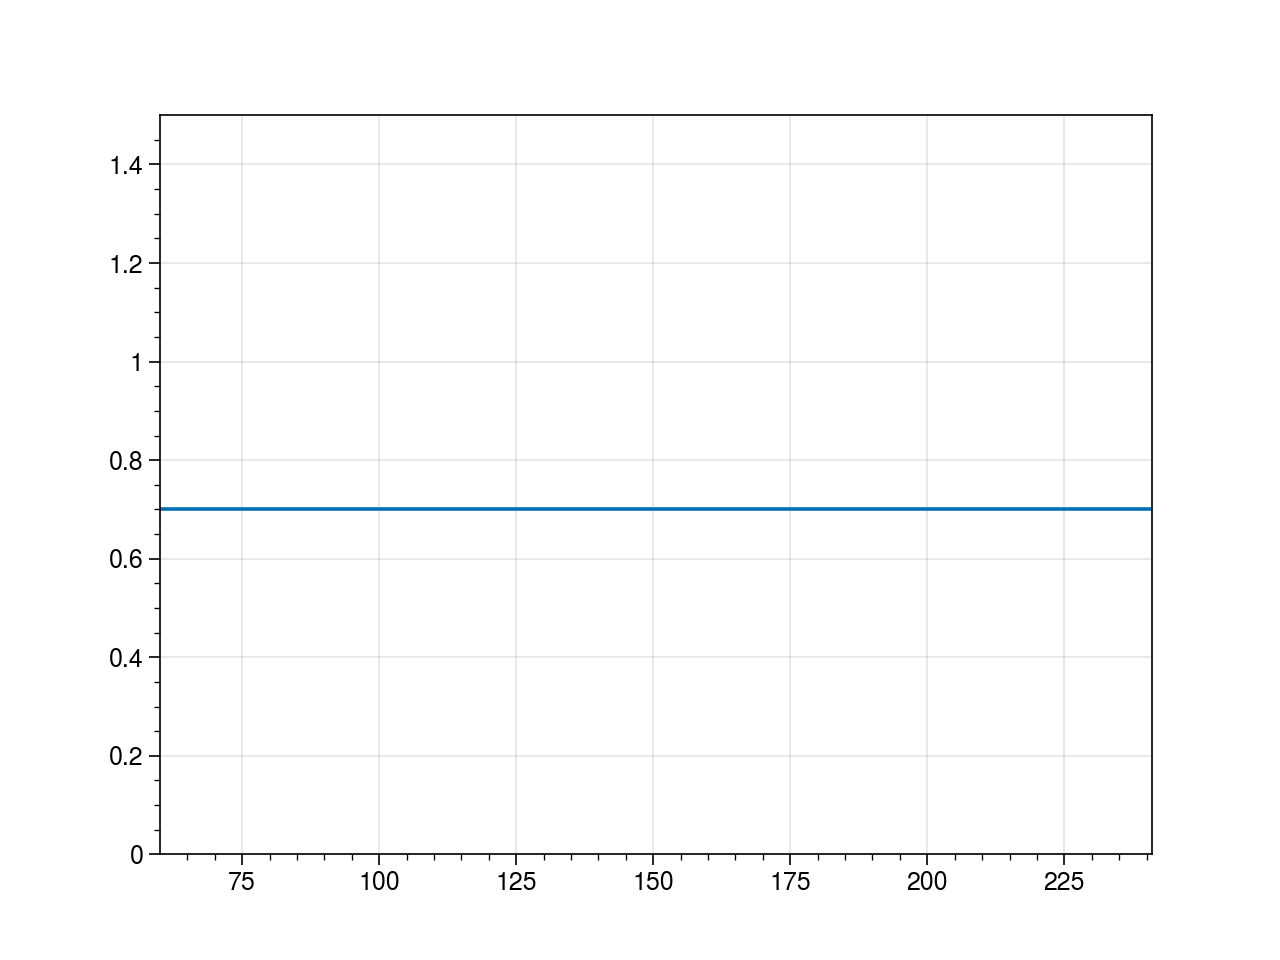

In [145]:
# New kc curve
plt.plot(output_kc[1][60:242]['kc'])
plt.ylim(0,1.5)

In [165]:
len(output_kc)
output_kc[1]

,kc,LAI,stress,R,s,I,E,ET,T,L,dsdt,dos,doy
0,0.7,3.0,1.000000,0.000000,0.402990,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,365
1,0.7,3.0,1.000000,0.000000,0.402990,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1
2,0.7,3.0,1.000000,0.000000,0.402990,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2
3,0.7,3.0,1.000000,6.899764,0.402990,3.0,0.000672,0.000672,0.000000,0.0,3.899092,0.0,3
4,0.7,3.0,1.000000,0.000000,0.423468,0.0,0.000671,0.000671,0.000000,0.0,-0.000671,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.7,3.0,0.000000,0.000000,0.818028,0.0,0.824518,3.624518,2.800000,0.0,-3.624518,178.0,237
238,0.7,3.0,0.000000,0.000000,0.798992,0.0,0.766080,3.566080,2.800000,0.0,-3.566080,179.0,238
239,0.7,3.0,0.000000,0.000000,0.780262,0.0,0.709999,3.509999,2.800000,0.0,-3.509999,180.0,239
240,0.7,3.0,0.005284,0.000000,0.761827,0.0,0.656206,3.252673,2.596468,0.0,-3.252673,181.0,240


In [160]:
# export the simulations

n_sim = 500
no_sims = np.arange(0,n_sim)

# export simulations
for i in no_sims:
    output_kc[i][60:240].to_csv('../output/revisions/sims.3.12.21.x/%s.csv' % i) 

In [166]:
# then reimport the simulations

# this takes a while
n_sim = 500
no_sims = np.arange(0,n_sim)

files = glob.glob('../output/revisions/sims.3.12.21.x/*.csv')

output = []
for f, n in zip(files, no_sims):
    f_ = pd.read_csv(f).drop('Unnamed: 0',axis=1)
    output.append(f_)

In [167]:
output[1]

,kc,LAI,stress,R,s,I,E,ET,T,L,dsdt,dos,doy
0,0.7,3.0,0.408477,0.000000,0.620220,0.0,0.294164,1.304623,1.010459,0.0,-1.304623,1.0,60
1,0.7,3.0,0.444262,0.000000,0.613368,0.0,0.279193,1.212910,0.933717,0.0,-1.212910,2.0,61
2,0.7,3.0,0.478879,9.516217,0.606997,3.0,0.341641,1.587317,1.245676,0.0,4.928901,3.0,62
3,0.7,3.0,0.346288,0.000000,0.632884,0.0,0.322511,1.474816,1.152304,0.0,-1.474816,4.0,63
4,0.7,3.0,0.383714,0.000000,0.625138,0.0,0.305071,1.370621,1.065551,0.0,-1.370621,5.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.7,3.0,0.349250,0.000000,0.632257,0.0,0.321086,1.466359,1.145273,0.0,-1.466359,176.0,235
176,0.7,3.0,0.386610,0.000000,0.624555,0.0,0.303770,1.362787,1.059017,0.0,-1.362787,177.0,236
177,0.7,3.0,0.423033,0.000000,0.617398,0.0,0.287967,1.266819,0.978853,0.0,-1.266819,178.0,237
178,0.7,3.0,0.458361,0.000000,0.610744,0.0,0.273531,1.177865,0.904334,0.0,-1.177865,179.0,238


Laikipia station data was inputted.


[Text(0, 0.5, 'Relative soil \n moisture content [s]')]

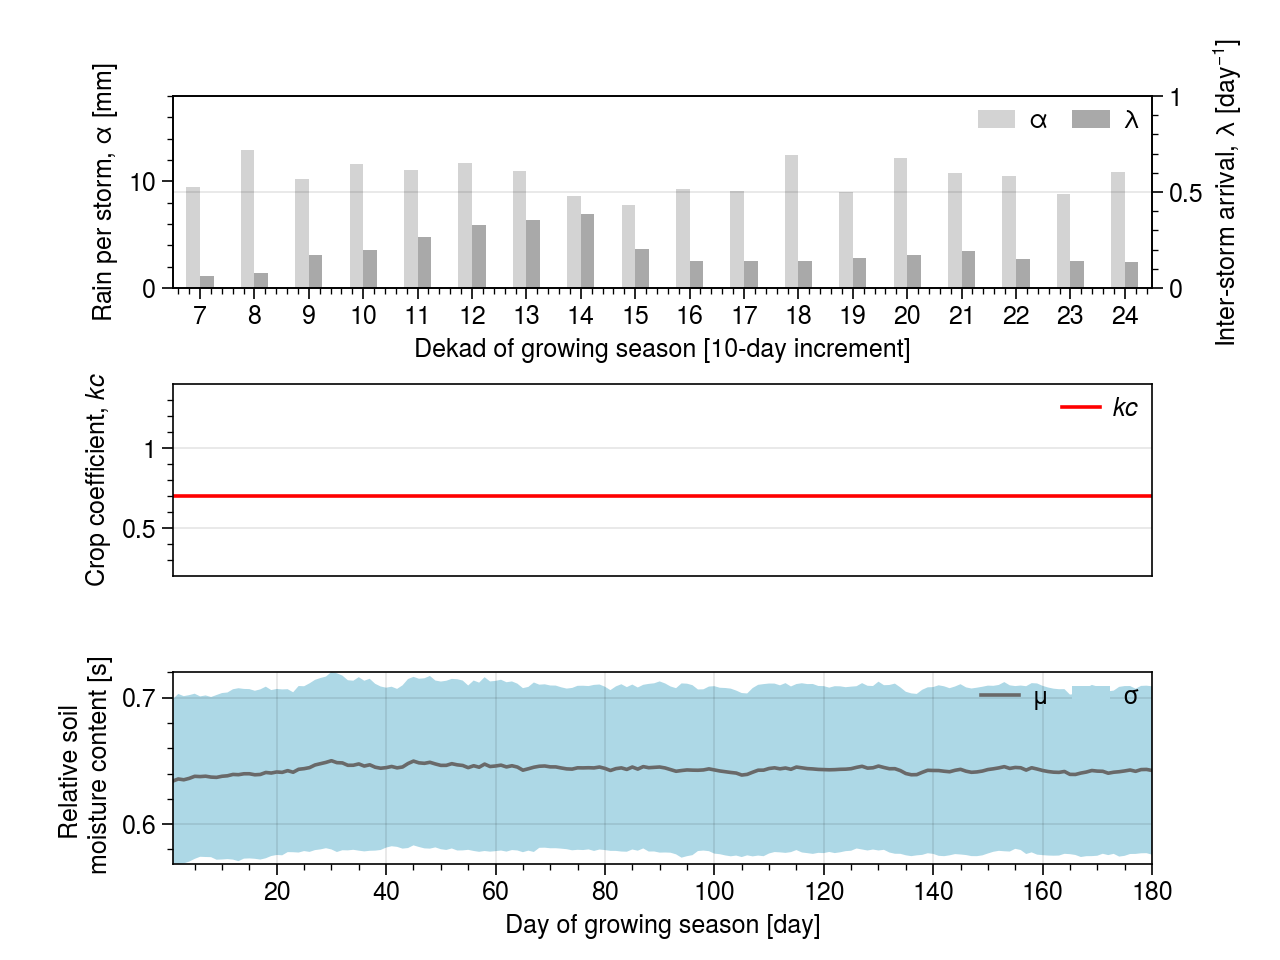

In [168]:
# Which plots to make?

# this block does not like to be re-run
s0_climate = Climate(station='OL JOGI FARM', data_file='../data/CETRAD/CETRAD_rainfall.csv', interval='dekad')

# We want the unique values of alpha_r and lambda_r, so grab every 10th element of the list 
a = s0_climate.alpha_r[0::10]
l = s0_climate.lambda_r[0::10]

# make a dataframe
dekads = pd.DataFrame({'alpha':a, 'lambda':l, 'dekad':np.arange(1,38,1),'day':['10','20','30','40',
                                                                           '50','60','70','80','90','100',
                                                                            '110','120','130','140','150','160',
                                                                               '170','180','190','200','210','220',
                                                                               '230','240','250','260','270','280','290',
                                                                               '300','310','320','330','340','350','360','365'
                                                                              ]})

# figure set up
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex=False)
left   =  0.135  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .3     # the amount of width reserved for blank space between subplots
hspace =  0.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#subset dataframe
dekads = dekads[6:24].set_index('dekad').drop(['day'], axis=1)

# plot the dekadal rainfall values
dekads.plot(kind="bar", ax=ax1, ylim=(0,18),rot=360, color=['lightgray','darkgray'])

ax1_ = ax1.twinx()
for r in ax1.patches[len(dekads):]:
    r.set_transform(ax1_.transData)

ax1.set_ylabel(r'Rain per storm, $\alpha$ [mm]')
ax1_.set_ylabel('Inter-storm arrival, $\lambda$ [day$^{-1}$]')
#ax1.set_xlabel([], color='white')
ax1.legend([r'$\alpha$', r'$\lambda$'], ncol=2, frameon=False)
ax1.set_xlabel('Dekad of growing season [10-day increment]')
ax1_.set_xlabel([''])

ax1.grid(which='major',axis='both')

# Plot b) Crop Coefficient
#o = output[0]
#o.index = o.index+1 # make doy cooperate better

#climate = Climate(station='OL JOGI FARM', interval='dekad', data_file = module_path + '/data/CETRAD/CETRAD_rainfall.csv')

#soil = Soil(texture='clay loam')
#crop = Crop(soil=soil, lgp=180)
#soil.set_nZr(crop)

#model = CropModel(crop=crop, climate=climate, soil=soil)
#model.run()
#o = model.output() # This is the correct length
#_kc = o[61:242]['kc']
_kc = output[1]['kc'] # use kc from actual output

ax2.plot(_kc, 'r-') 
ax2.set(ylabel='Crop coefficient, $\mathit{kc}$')
ax2.set_ylim(0.2, 1.4)
ax2.legend(['$\mathit{kc}$'],frameon=False)
#ax2.tick_params(axis = "x", bottom = False, top = False)
ax2.xaxis.set_visible(False)


# Plot c) Saturation
output_s = pd.concat([d for d in output], axis=1) 
avg_df_180 = output_s['s'].dropna() 
avg_df_180["mean"] = avg_df_180.mean(axis=1)  
avg_df_180["var"] = avg_df_180.std(axis=1)  # ddof=0, 

avg_df_180.index = avg_df_180.index+1 # make doy cooperate better

ax3.plot(avg_df_180['mean'], 'dimgray')

x = np.arange(1, 181, 1)
ax3.fill_between(x, avg_df_180['var']+avg_df_180['mean'], avg_df_180['mean']-avg_df_180['var'],facecolor='lightblue')
ax3.set(xlabel='Day of growing season [day]') # $\mathit{d}$
ax3.legend(['$\mu$','$\sigma$'], ncol=2, frameon=False)
ax3.set(ylabel='Relative soil \n moisture content [s]') # , $\mathit{s}$

#plt.savefig('../output/high-res-figures/fig5_threefigs_dekadal.pdf')
#plt.savefig('../output/high-res-figures/fig5_threefigs_dekadal.png',dpi=600)

2.9088107331064315


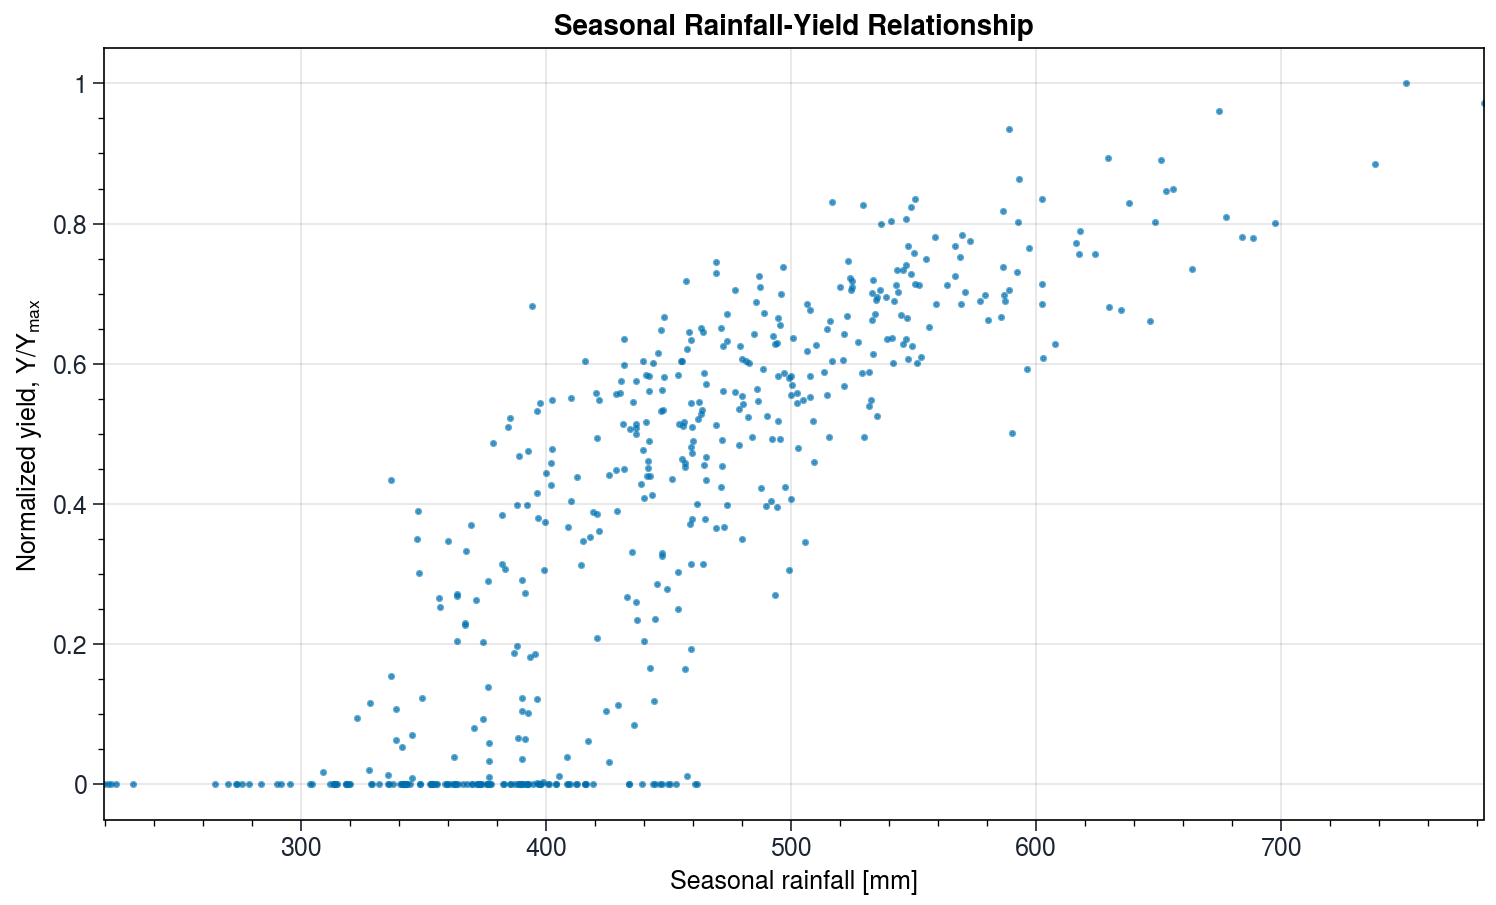

In [169]:
# # Figure 8. Dynamic Stress-Rainfall-Yield Relationship

# # line up the data
# data = [crop.calc_dstress(s=df.s, stress=df.stress) for df in output]
# rf = [df['R'].sum() for df in output]
    
# # Turn dynamic water stress data into a tuple
# df = pd.DataFrame.from_records(data, columns =['AvgStress2','DynamicStress','Yield'])
# df['RF'] = rf
# print(max(df.Yield)/1000)

# # Dynamic Stress Yield Rlxn

# def fig8(df=None):
#     # We'll be using these variables a lot
#     x = df.RF
#     y = df.Yield

#     # Scatter plot of raw data
#     max(df.Yield)

#     # Y axis can either be nornalized yield or yield
#     df['Yield_norm'] = df.Yield/max(df.Yield)

#     f, axs = plot.subplots(journal='agu2') #, tight=False
#     axs.format(
#         abc=False, abcloc='ul', suptitle='Seasonal Rainfall-Yield Relationship')
    
#     cols = 'dark'
    
#     plt.scatter(df.RF, df.Yield_norm, alpha=0.6, size=2.5) # , color='blue' # , color='black'
#     plt.ylim(-.05,1.05)
#     plt.ylabel('Normalized yield, $Y/Y_{max}$ ') # Yield normalized by max. yield
#     plt.xlabel('Seasonal rainfall [mm]')
#     #plt.savefig('../output/high-res-figures/fig8_dyn-stress.png',format='png',dpi=300)
#     #plt.savefig('../output/high-res-figures/fig8_dyn-stress.pdf')
    
#     axs.tick_params(axis='y', colors=cols)
#     axs.tick_params(axis='x', colors=cols)
    
# fig8(df=df)

In [ ]:
# # # Fig. 9 Cultivar PDF

# def cultivar_runs():

#     # Now I have to re-run the simulations using the max yields from this relationship
#     varieties = np.arange(75,180,5)
#     len(varieties)

#     result = []

#     for i in varieties:
#         # note: bumping up to 200 sims per cultivar type takes several minutes to run
#         # whereas 100 sims where varieties = np.arange(70,200,5) takes less than a minute.
#         #data, rf, lgp, avg_s, output, start, end, crop, station, texture, pd_sim, n_sim, burn_in = run(alpha_r =a_mid, lambda_r= l_mid, n_sim=500, station='OL JOGI FARM', texture='clay loam', lgp=i, pd_sim=60)
#         data, rf, lgp, avg_s, output_orig, crop, station, texture, pd_sim, n_sim, burn_in, start, end = run(alpha_r =a_mid, lambda_r= l_mid, n_sim=500, station='OL JOGI FARM', texture='clay loam', lgp=i, pd_sim=60)
#         df = pd.DataFrame.from_records(data, columns =['AvgStress','DynamicStress','Yield'])
#         df['RF'] = rf
#         df['Cultivar'] = i
#         result.append(df)
        
#     return result

# result = cultivar_runs()
# result = pd.concat(result)

# # Add categorical values for early, medium and late maturing
# # There is probably a way more efficient way to do this
# def category(x):
#     if x < 110:
#         return "Early (< 105 d)"
#     if 110 <= x <= 140:
#         return "Medium (110 - 140 d)"
#     else:
#         return "Late (145 + d)"

# for row in result.Cultivar:
#     result['Category'] = result.Cultivar.apply(lambda x: category(x))



In [ ]:
# # for average yield need to take non-zero numbers
# r0=result
# r0[r0 == 0] = np.nan

# early = r0.query("Category == 'Early (< 105 d)'")
# med = r0.query("Category == 'Medium (110 - 140 d)'")
# late = r0.query("Category == 'Late (145 + d)'")

# # need to use nan mean for Yield because 0s were turned into nans
# e_rf, e_y = early.RF.mean(), np.nanmean(early.Yield)
# m_rf, m_y = med.RF.mean(), np.nanmean(med.Yield)
# l_rf, l_y = late.RF.mean(), np.nanmean(late.Yield)

# # Turn nans back to zeros
# early = early.fillna(0)
# med = med.fillna(0)
# late = late.fillna(0)

# # Percent of crop failure - calc before turning nans to zero
# c_e = len(early.loc[early['Yield'] == 0].count(axis=1))/len(early)*100
# c_m = len(med.loc[med['Yield'] == 0].count(axis=1))/len(med)*100
# c_l = len(late.loc[late['Yield'] == 0].count(axis=1))/len(late)*100

# # code for ticks
# import matplotlib.ticker as mticker
# f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
# g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))
# cbar_kws={'format': mticker.FuncFormatter(g)}

In [ ]:
# def fig_9():

#     # I dont know how to do this with proplot - to get nice abcd, put in an issue
#     fig, axes = plt.subplots(ncols=3,nrows=1,figsize=(8,3), sharey=True, sharex=True) 

#     # Labels, ticker
#     import matplotlib.patches as mpatches
#     import matplotlib.ticker as mticker


#     red_patch = mpatches.Patch(color='red', label='Early: <105 d', alpha=0.5)
#     orange_patch = mpatches.Patch(color='orange', label='Medium: 110-140 d', alpha=0.5)
#     blue_patch = mpatches.Patch(color='blue', label='Late: 145+ d', alpha=0.5)

#     f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
#     g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))


#     sns.kdeplot(early.RF, early.Yield, xlim=(0,700),ylim=(-0.3,3.5), alpha=0.5, kind='kde',cmap="reds", shade=True, 
#                     shade_lowest=False, cbar=True, ax=axes[0], label='early', cbar_kws={'format': mticker.FuncFormatter(g)})
#     ax1 = axes[0]
#     ax1.text(e_rf,e_y, "x", size=12, color='k')
#     ax1.set(ylabel='Yield [t/ha]')
#     ax1.set(xlabel='')
#     ax1.legend(handles=[red_patch],loc='upper left', frameon=False)
#     ax1.set(ylim=(-0.3,3.5))

#     #plt.show()
#     ax2 = axes[1]
#     sns.kdeplot(med.RF, med.Yield, xlim=(0,700),ylim=(-0.3,3.5),alpha=0.5,kind='kde',cmap="oranges", 
#                       shade=True, shade_lowest=False, cbar=True,ax=ax2, cbar_kws={'format': mticker.FuncFormatter(g)})
#     ax2.text(m_rf,m_y,"x",size=12,color='k')
#     ax2.set(xlim=(0,700))
#     ax2.set(ylabel='')
#     ax2.set(xlabel='Seasonal rainfall [mm]')
#     ax2.legend(handles=[orange_patch],loc='upper left', frameon=False)


#     ax3 = axes[2]
#     #plt.show()
#     sns.kdeplot(late.RF, late.Yield,xlim=(0,700),ylim=(-0.3,3.5), alpha=0.5,kind='kde',cmap="blues", shade=True, shade_lowest=False, cbar=True, ax=ax3, cbar_kws={'format': mticker.FuncFormatter(g)}) #greens
#     ax3.text(l_rf,l_y, "x", size=12, color='k')
#     ax3.set(ylabel='')
#     ax3.set(xlabel='')
#     ax3.legend(handles=[blue_patch],loc='upper left', frameon=False)

#     fig.tight_layout()
#     #plt.savefig('../output/high-res-figures/fig9_varietiesPDF.pdf')
#     #plt.savefig('../output/high-res-figures/fig9_varietiesPDF.png',dpi=300)
    
# fig_9()

## 1.19 

Section 2 in general: A lot hinges on all of the crop parameters in Table 3 (and the soil parameters, but these have at least been pulled from local soil texture information). Since this is a stochastic modeling exercise, it seems like it should be easy enough to do some stochastic sensitivity analysis using distributions of parameter values to 1) highlight the confidence in the results and 2) highlight which crop model parameters are critical to pin down through field experiments to constrain uncertainty in future modeling endeavors.

As a reminder here is table 3:
<img src="files/table3.png" width="400" height="800">

Sensitivity analysis on values of r and k for dynamic stress:

In [42]:
# Messing around with values of r and k 
# We can change the values of r using this function
def _calc_dstress(s, stress, K_PAR = 0.2, R_PAR=0.5, Y_MAX=4260): # got rid of self
        '''Calculates dyamic water stress (theta) which is a measure of total water stress during the growing season
        as proposed in Porporato et al. (2001). Considers the duration and frequency of water defict periods below a 
        critical value. The function also calculates yield based on dynamic water stress and returns three items in a
        list: average static water stress, dynamic water stress, and yield in kg per ha. 
        
        Usage: calc_dstress(s, stress):

            s = relative saturation [0-1]
            stress = static stress [0-1]

        Default values:
            mstr_memb = average static stress [0-1]
            mcrs_memb = average duration of water stress [days]
            ncrs_memb = average frequency of water stress [dim]
            self.lgp = length of the growing season [days]
            K_PAR = fraction of growing season before crop fails [dim]
            R_PAR = effect of number of excursions below stress point [dim]
            INVL_SIMU = number of daily timesteps used in calculating the soil moisture time series [dim]

        Returns:
            mstr_memb = np.mean(((self.s_star - s)/(self.s_star - self.sw))**q) # average static water stress
            dstr_memb = (mstr_memb * mcrs_memb) / (K_PAR * self.lgp))**(ncrs_memb**-R_PAR) # dynamic water stress
            yield_kg_ha = Y_MAX * (1 - dstr_memb) # yield in kg per ha
        
        '''
        # REMOVED SELF FROM THIS FUNCTION
        
        # Step 0. Define variables
        K_PAR = K_PAR
        R_PAR = R_PAR 
        INVL_SIMU = 1
        # added this
        lgp = 180
        # Step 1. Calculate average static stress
        if len(stress) > 0:
            # Subset the growing period and get avg soil moisture
            start = 60 
            end = start + lgp
            stress_subset = stress[start:end]
            mstr_memb = np.mean(stress_subset)
        else:
            mstr_memb = 0.

        # Step 2. Calculate threshold crossing parameters
        # Select indices of s time series where s is below wilting point
        indx_memb = np.where(s >= crop.s_star) 
        # Append to an array using np.append where last value is lgp+1 and INVL_SIMU is how many simulations are being run
        # Then have zero be the first item and 
        # with np.diff give the difference to find the soil moisture difference between s_star and the excursion
        ccrs_memb = np.diff(np.append(0, np.append(indx_memb, INVL_SIMU * lgp + 1))) - 1 # play around with this to figure it out 
        # The duration of water stress events where there is stress because value is greater than 0
        ccrs_memb = ccrs_memb[ccrs_memb > 0]
        # Variable with number of excursions below wilting point (frequency)
        ncrs_memb = len(ccrs_memb)  # dim 
        if ncrs_memb > 0:
            # if there are more than 0 excursions then calculate mean of duration of water stress and divide by INVL_SIMU
            mcrs_memb = np.mean(ccrs_memb) / INVL_SIMU # days
        else:
            mcrs_memb = 0.
            
        # Step 3. Calculate dynamic stress
        dstr_memb = ((mstr_memb * mcrs_memb) / (K_PAR * lgp))**(ncrs_memb**-R_PAR)
        if dstr_memb > 1.:
            dstr_memb = 1.

        # Step 4. Calculate yield
        yield_kg_ha = Y_MAX * (1 - dstr_memb)

        return mstr_memb, dstr_memb, yield_kg_ha
    

In [43]:
# Then we call on calc_dstress with this function

def dyn_stress(n_sim = 5000, station = 'OL JOGI FARM', texture = 'clay loam', lgp=180, pd_sim=60): 
    """ Run simulations for a specific climate, soil, and crop.

    Usage: total_rf_corr(n_sim, pd_ic, station, texture, lgp, pd_sim)
           
    Default values:
        n_sim = 500 # Number of Simulations to Remove Initial Conditions [integer]
        pd_ic = 1 # Planting Date for Initial Conditions [Julian day]
        station = 'OL JOGI FARM' # Climatology [string]
        texture = 'clay' # Soil Type [string]
        lgp = 180 # Length of Growing Period [Days]
        pd_sim 100 # Planting Date for Simulation [Julian day]

    """
    # Part 1. Set conditions for IC runs
    n_sim = n_sim # change back to 1000 later
    planting_date = pd_sim 

    # Part 2. Initialize model with a climate, soil and crop
    climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        do_std=False) # This should be false, always
    soil = Soil(texture=texture)
    crop = Crop(soil=soil, lgp=lgp)
    soil.set_nZr(crop)

    model = CropModel(crop=crop, climate=climate, soil=soil)
    model.run()
    o = model.output()

    # Part 3. Get the mean, SD soil moisture and run the simulations to remove IC
    n_burn_in_sims = max(10, int(n_sim*.10))
    s0_mean, s0_std = average_soil_moisture(model, n_sims=n_burn_in_sims, doy=planting_date)
    models = [CropModel(crop=crop, climate=Climate(do_std=False), soil=soil) for i in np.arange(n_sim)]
    
    # Part 4. Run the actual simulations
    output = [model.run(s0=s0_mean, do_output=True, planting_date=planting_date) for model in models]
    # added this
    lgp = lgp
    # Part 5. Subset the growing period and get avg stress, total rf
    start = 60 
    end = start + lgp
    avg_stress = [df[start:end]['stress'].mean() for df in output]
    total_stress = [df[start:end]['stress'].sum() for df in output]

    # dont need this but helpful for debugging
    total_rf = [df[start:end]['R'].sum() for df in output]
    avg_s = [df[start:end]['s'].mean() for df in output]
    sat = [df[start:end]['s'] for df in output]
    stress = [df[start:end]['stress'] for df in output]
    
    o = output
    
    # New thing: Try different values of r parameter
    result = []
    rs = [0.1, 0.3, 0.5, 0.7, 0.9]

    for i in rs:
        # Part 6. Output the dynamic stress and yield values
        # prev crop.calc_dstress
        x = [_calc_dstress(s=df.s, stress=df.stress, R_PAR=i) for df in o] #for i in np.arange(n_sim)
        data_tuples = list(zip(x))
        df = pd.DataFrame(data_tuples, columns=['x']) # 
        result.append(df)
        df['R_PAR'] = i
        df['TotalRF'] = total_rf

    result = pd.concat(result)
    df = result
    # Need to seperate the tuples
    df[['AvgStress', 'DynamicStress','Yield']] = pd.DataFrame(df['x'].tolist(), index=df.index) 
    r_test = df[['R_PAR','AvgStress','DynamicStress','Yield','TotalRF']]
    
    # Part 7. TODO: Define kc, a little janky and needs to be automated
    start = 60
    end = 60 + 180
    kc = o[1][start:end]['kc'].tolist()
    print('done')
    return  total_rf, r_test, rs #output, avg_stress, total_stress, total_rf, mstr_memb, dstr_memb, yield_kg_ha
    # x, total_rf, sat, stress, o, crop, output, kc, start, end, 
    
# TODO: There's got to be a better way than to return all of these variables.
# But also maybe this is temporary for testing
total_rf, r_test, rs = dyn_stress()

# data, rf, sat, stress, o, crop, output, kc, start, end, result

Laikipia station data was inputted.
done


In [44]:
#, 0.3, 0.5, 0.7, 0.9
sc2 = r_test.loc[r_test['R_PAR'] == 0.1]
r_test
r_test['Yield'] = r_test['Yield']/1000
r_test

,R_PAR,AvgStress,DynamicStress,Yield,TotalRF
0,0.1,0.296131,0.288535,3.030842,584.620690
1,0.1,0.176539,0.105655,3.809908,635.488687
2,0.1,0.251244,0.334593,2.834635,495.332615
3,0.1,0.318669,0.426960,2.441150,436.304601
4,0.1,0.459602,0.370266,2.682665,431.096715
...,...,...,...,...,...
4995,0.9,0.433811,1.000000,0.000000,331.032999
4996,0.9,0.393586,0.988420,0.049331,413.623507
4997,0.9,0.312553,0.821961,0.758446,466.354651
4998,0.9,0.390520,0.797913,0.860889,412.362842


In [29]:
# # Maybe I should make these different plots instead

# fig, ax = plt.subplots(nrows = 2, ncols = 3, sharey=True, sharex=True)

# #for i in rs:
# #    select_color = r_test.loc[r_test['R_PAR'] == i]
# #    select_color
   
# select_color = r_test.loc[r_test['R_PAR'] == 0.05]
# sc2 = r_test.loc[r_test['R_PAR'] == 0.2]
# sc4 = r_test.loc[r_test['R_PAR'] == 0.4]
# sc6 = r_test.loc[r_test['R_PAR'] == 0.6]
# sc8 = r_test.loc[r_test['R_PAR'] == 0.8]
# sc1 = r_test.loc[r_test['R_PAR'] == 1.1]

# ax[0,0].scatter(select_color['TotalRF'], select_color['Yield']/1000,  s=0.4,marker='s', alpha=0.5,color='gray')
# ax[0,1].scatter(sc2['TotalRF'], sc2['Yield']/1000, marker='s',  s=0.4,alpha=0.5, color="Navy")
# ax[0,2].scatter(sc4['TotalRF'], sc4['Yield']/1000, marker='s',  s=0.4,alpha=0.5,color="Slate Blue")
# ax[1,0].scatter(sc6['TotalRF'], sc6['Yield']/1000, marker='s',  s=0.4,alpha=0.5,color="Royal Blue")
# ax[1,1].scatter(sc8['TotalRF'], sc8['Yield']/1000, marker='s', s=0.4, alpha=0.5,color="Dark Turquoise")
# ax[1,2].scatter(sc1['TotalRF'], sc1['Yield']/1000, marker='s', s=0.4, alpha=0.5,color='black')

# ax[0,0].set_title('r = 0.05')
# ax[0,1].set_title('r = 0.2')
# ax[0,2].set_title('r = 0.4')
# ax[1,0].set_title('r = 0.6')
# ax[1,1].set_title('r = 0.8')
# ax[1,2].set_title('r = 1.1')

# #for ax in ax.flat:
# #    ax.set(xlabel='x-label', ylabel='y-label')

# fig.text(0.5, 0.04, 'Rainfall (mm)', ha='center')
# fig.text(0.06, 0.5, 'Yield (tons/ha)', va='center', rotation='vertical')
# plt.ylim(-0.5,4.5)
# plt.xlim(200,800)

Justification: Different values of r parameter generally show the relationship we're looking for and the maximum attained yield decreases with increasing values of r. Because the maximum yield from the seed company was about 4 t/ha we're comfortabel with the maximum yields that are less than that so going with r = 0.2.  

In [45]:
# New function to test values of k 

# Then we call on calc_dstress with this function

def dyn_stress(n_sim = 5000, station = 'OL JOGI FARM', texture = 'clay loam', lgp=180, pd_sim=60): 
    """ Run simulations for a specific climate, soil, and crop.

    Usage: total_rf_corr(n_sim, pd_ic, station, texture, lgp, pd_sim)
           
    Default values:
        n_sim = 500 # Number of Simulations to Remove Initial Conditions [integer]
        pd_ic = 1 # Planting Date for Initial Conditions [Julian day]
        station = 'OL JOGI FARM' # Climatology [string]
        texture = 'clay' # Soil Type [string]
        lgp = 180 # Length of Growing Period [Days]
        pd_sim 100 # Planting Date for Simulation [Julian day]

    """
    # Part 1. Set conditions for IC runs
    n_sim = n_sim # change back to 1000 later
    planting_date = pd_sim 

    # Part 2. Initialize model with a climate, soil and crop
    climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        do_std=False) # This should be false, always
    soil = Soil(texture=texture)
    crop = Crop(soil=soil, lgp=lgp)
    soil.set_nZr(crop)

    model = CropModel(crop=crop, climate=climate, soil=soil)
    model.run()
    o = model.output()

    # Part 3. Get the mean, SD soil moisture and run the simulations to remove IC
    n_burn_in_sims = max(10, int(n_sim*.10))
    s0_mean, s0_std = average_soil_moisture(model, n_sims=n_burn_in_sims, doy=planting_date)
    models = [CropModel(crop=crop, climate=Climate(do_std=False), soil=soil) for i in np.arange(n_sim)]
    
    # Part 4. Run the actual simulations
    output = [model.run(s0=s0_mean, do_output=True, planting_date=planting_date) for model in models]
    # added this
    lgp = 180
    # Part 5. Subset the growing period and get avg stress, total rf
    start = 60 
    end = start + lgp
    avg_stress = [df[start:end]['stress'].mean() for df in output]
    total_stress = [df[start:end]['stress'].sum() for df in output]

    # dont need this but helpful for debugging
    total_rf = [df[start:end]['R'].sum() for df in output]
    avg_s = [df[start:end]['s'].mean() for df in output]
    sat = [df[start:end]['s'] for df in output]
    stress = [df[start:end]['stress'] for df in output]
    
    o = output
    
    # New thing: Try different values of k parameter
    result = []
    ks = [0.05, 0.1, 0.2, 0.4, 0.6]

    for i in ks:
        # Part 6. Output the dynamic stress and yield values
        # prev crop.calc_dstress
        x = [_calc_dstress(s=df.s, stress=df.stress, K_PAR=i, R_PAR=0.5) for df in o] #for i in np.arange(n_sim)
        data_tuples = list(zip(x))
        df = pd.DataFrame(data_tuples, columns=['x']) # 
        result.append(df)
        df['K_PAR'] = i
        df['TotalRF'] = total_rf

    result = pd.concat(result)
    df = result
    # Need to seperate the tuples
    df[['AvgStress', 'DynamicStress','Yield']] = pd.DataFrame(df['x'].tolist(), index=df.index) 
    k_test = df[['K_PAR','AvgStress','DynamicStress','Yield','TotalRF']]
    
    # Part 7. TODO: Define kc, a little janky and needs to be automated
    start = 60
    end = start + 180
    kc = o[1][start:end]['kc'].tolist()
    print('done')
    return  total_rf, k_test, rs #output, avg_stress, total_stress, total_rf, mstr_memb, dstr_memb, yield_kg_ha
    # x, total_rf, sat, stress, o, crop, output, kc, start, end, 
    
total_rf, k_test, rs = dyn_stress()



Laikipia station data was inputted.
done


In [46]:
k_test['Yield'] = k_test['Yield']/1000
k_test

,K_PAR,AvgStress,DynamicStress,Yield,TotalRF
0,0.05,0.373583,1.000000,0.000000,455.647913
1,0.05,0.437790,1.000000,0.000000,302.620243
2,0.05,0.500338,1.000000,0.000000,351.330389
3,0.05,0.517140,1.000000,0.000000,328.372669
4,0.05,0.339204,1.000000,0.000000,449.379746
...,...,...,...,...,...
4995,0.60,0.290032,0.342864,2.799399,548.153465
4996,0.60,0.376081,0.394464,2.579583,377.114358
4997,0.60,0.628957,1.000000,0.000000,259.970717
4998,0.60,0.333252,0.363198,2.712779,433.889584


In [47]:
# # Maybe I should make these different plots instead

# fig, ax = plt.subplots(nrows = 2, ncols = 3, sharey=True, sharex=True)
   
# select_color = k_test.loc[k_test['K_PAR'] == 0.05]
# sc2 = k_test.loc[k_test['K_PAR'] == 0.2]
# sc4 = k_test.loc[k_test['K_PAR'] == 0.4]
# sc6 = k_test.loc[k_test['K_PAR'] == 0.5]
# sc8 = k_test.loc[k_test['K_PAR'] == 0.6]
# sc1 = k_test.loc[k_test['K_PAR'] == 0.8]

# ax[0,0].scatter(select_color['TotalRF'], select_color['Yield']/1000, s=0.4,marker='s', alpha=0.5,color='gray')
# ax[0,1].scatter(sc2['TotalRF'], sc2['Yield']/1000, marker='s',  s=0.4,alpha=0.5, color="Navy")
# ax[0,2].scatter(sc4['TotalRF'], sc4['Yield']/1000, marker='s',  s=0.4,alpha=0.5,color="Slate Blue")
# ax[1,0].scatter(sc6['TotalRF'], sc6['Yield']/1000, marker='s',  s=0.4,alpha=0.5,color="Royal Blue")
# ax[1,1].scatter(sc8['TotalRF'], sc8['Yield']/1000, marker='s', s=0.4, alpha=0.5,color="Dark Turquoise")
# ax[1,2].scatter(sc1['TotalRF'], sc1['Yield']/1000, marker='s', s=0.4, alpha=0.5,color='black')

# ax[0,0].set_title('k = 0.05')
# ax[0,1].set_title('k = 0.2')
# ax[0,2].set_title('k = 0.4')
# ax[1,0].set_title('k = 0.5')
# ax[1,1].set_title('k = 0.6')
# ax[1,2].set_title('k = 0.8')

# #for ax in ax.flat:
# #    ax.set(xlabel='x-label', ylabel='y-label')

# fig.text(0.5, 0.04, 'Rainfall (mm)', ha='center')
# fig.text(0.06, 0.5, 'Yield (tons/ha)', va='center', rotation='vertical')
# # gah I quit on making this complicated
# plt.ylim(-0.5,4.5)
# plt.xlim(200,800)

In [48]:
crop.s_star

0.78

In [49]:
# Qstress

def _calc_stress(s, q=2, sw=crop.sw, s_star=crop.s_star):
        """ Calculates static water stress.

        Usage: calc_stress(s, q=2)

            s = relative saturation [0-1]
            q = 2

        Note: The value of q changes based on plant species or soil type. 
        See equation 4.13, p.101 in Rodriguez-Iturbe & Porporato (2004)
        """
        if s < sw:
            stress = 1
        elif s >= s_star:
            stress = 0
        else:
            stress = ((s_star - s)/(s_star - sw))**q
        return stress

In [50]:
# Then we call on calc_kc with this function

def qstress_runs(alpha_r = None, lambda_r = None, n_sim = 5000,  burn_in = 60,  station = 'OL JOGI FARM', data_file = module_path + '/data/CETRAD/CETRAD_rainfall.csv',
    texture = 'clay loam', lgp=180, pd_sim=60, interval='dekad', do_std=True, qstress=None): 
    """ Run simulations for a specific climate, soil, and crop.

    Usage: total_rf_corr(n_sim, pd_ic, station, texture, lgp, pd_sim)
           
    Default values:
        n_sim = 500 # Number of Simulations to Remove Initial Conditions [integer]
        pd_ic = 1 # Planting Date for Initial Conditions [Julian day]
        station = 'OL JOGI FARM' # Climatology [string]
        texture = 'clay' # Soil Type [string]
        lgp = 180 # Length of Growing Period [Days]
        pd_sim 100 # Planting Date for Simulation [Julian day]

    """
    # Part 1. Set conditions for IC runs
    n_sim = n_sim # change back to 1000 later
    planting_date = pd_sim 

    # Part 2. Initialize model with a climate, soil and crop
    climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        do_std=False) # This should be false, always
    soil = Soil(texture=texture)
    
    # Mess with Crop object 
    # orig: F1 = 0.16, F2 = 0.44, F3 = 0.76
    result = []
    #rs = [0.05, 0.2, 0.4, 0.6, 0.8, 1.1]
    crop = Crop(soil=soil, lgp=lgp, q=qstress)
    
    soil.set_nZr(crop)

    model = CropModel(crop=crop, climate=climate, soil=soil)
    model.run()
    o = model.output()

    # Part 3. Get the mean, SD soil moisture and run the simulations to remove IC
    n_burn_in_sims = max(10, int(n_sim*.10))
    s0_mean, s0_std = average_soil_moisture(model, n_sims=n_burn_in_sims, doy=planting_date)
    models = [CropModel(crop=crop, climate=Climate(do_std=False), soil=soil) for i in np.arange(n_sim)]
    
    # Part 4. Run the actual simulations 
    print("Step 4: \n\t... Running {n_sim} simulations.".format(n_sim=n_sim))
    # We imported printProgressBar from functions.py earlier:
    printProgressBar(0, n_sim, prefix = 'Progress:', suffix = 'Complete', length = 50)
    output = []
    for i, model in enumerate(models):
        output.append(model.run(s0=s0_mean, do_output=True, planting_date=pd_sim, t_before=burn_in)) # t_before=burn_in was removed
        printProgressBar(i + 1, n_sim, prefix = 'Progress:', suffix = 'Complete', length = 50)
    #output = [model.run(s0=s0_mean, do_output=True, t_before=burn_in, planting_date=pd_sim) for model in models]

    print("\t... Done.")

    # Part 5. Subset the growing period and get avg soil moisture
    # This is new:
    start = burn_in 
    end = start + lgp
    avg_s = [df[start:end]['s'].mean() for df in output] # Made a change here, I dont think this makes a diff.
    
    print("Step 5: \n\t...Subsetting data to growing period.")
     
    # Part 6. Output the dynamic stress and yield values
    print("Step 6: \n\t...Calculating plant stress.")

    x = [crop.calc_dstress(s=df[start:end].s, stress=df[start:end].stress, Y_MAX = evolved_calc_yield(dtm=lgp)) for df in output] # Made a change here
    
    rf = [df[start:end]['R'].sum() for df in output] # made a change here
    
    return x, rf, int(lgp), avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end


In [51]:
x_05, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qstress_runs(qstress=0.5)
x_1, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qstress_runs(qstress=1)
x_2, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qstress_runs(qstress=2)
x_3, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qstress_runs(qstress=3)
x_35, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qstress_runs(qstress=3.5)

Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating pl

In [52]:
# Turn dynamic water stress data into a tuple
result = []
my_list = [x_05, x_1, x_2, x_3, x_35]
ID = [0.5, 1, 2, 3, 3.5]
for i, z in zip(my_list, ID):
    
    df = pd.DataFrame.from_records(i, columns =['AvgStress2','DynamicStress','Yield'])
    df['RF'] = rf
    df['STRESS_PAR'] = z
    result.append(df)

result = pd.concat(result)
stress_test = result

#stress_test['Yield'] = stress_test.Yield*1000

In [53]:
# Now let's do q_e 

# Then we call on calc_kc with this function

def qe_runs(alpha_r = None, lambda_r = None, n_sim = 5000,  burn_in = 60,  station = 'OL JOGI FARM', data_file = module_path + '/data/CETRAD/CETRAD_rainfall.csv',
    texture = 'clay loam', lgp=180, pd_sim=60, interval='dekad', do_std=True, q_e=None): 
    """ Run simulations for a specific climate, soil, and crop.

    Usage: total_rf_corr(n_sim, pd_ic, station, texture, lgp, pd_sim)
           
    Default values:
        n_sim = 500 # Number of Simulations to Remove Initial Conditions [integer]
        pd_ic = 1 # Planting Date for Initial Conditions [Julian day]
        station = 'OL JOGI FARM' # Climatology [string]
        texture = 'clay' # Soil Type [string]
        lgp = 180 # Length of Growing Period [Days]
        pd_sim 100 # Planting Date for Simulation [Julian day]

    """
    # Part 1. Set conditions for IC runs
    n_sim = n_sim # change back to 1000 later
    planting_date = pd_sim 

    # Part 2. Initialize model with a climate, soil and crop
    climate = Climate(
        data_file=data_file,
        station=station,
        interval=interval,
        alpha_r = a_mid,
        lambda_r = l_mid,
        do_std=False,
        q_e = q_e) # This should be false, always
    soil = Soil(texture=texture)
    
    # Mess with Crop object 
    # orig: F1 = 0.16, F2 = 0.44, F3 = 0.76
    result = []
    #rs = [0.05, 0.2, 0.4, 0.6, 0.8, 1.1]
    crop = Crop(soil=soil, lgp=lgp)
    
    soil.set_nZr(crop)

    model = CropModel(crop=crop, climate=climate, soil=soil)
    model.run()
    o = model.output()

    # Part 3. Get the mean, SD soil moisture and run the simulations to remove IC
    n_burn_in_sims = max(10, int(n_sim*.10))
    s0_mean, s0_std = average_soil_moisture(model, n_sims=n_burn_in_sims, doy=planting_date)
    models = [CropModel(crop=crop, climate=Climate(q_e = q_e, do_std=False), soil=soil) for i in np.arange(n_sim)]
    
    # Part 4. Run the actual simulations 
    print("Step 4: \n\t... Running {n_sim} simulations.".format(n_sim=n_sim))
    # We imported printProgressBar from functions.py earlier:
    printProgressBar(0, n_sim, prefix = 'Progress:', suffix = 'Complete', length = 50)
    output = []
    for i, model in enumerate(models):
        output.append(model.run(s0=s0_mean, do_output=True, planting_date=pd_sim, t_before=burn_in)) # t_before=burn_in was removed
        printProgressBar(i + 1, n_sim, prefix = 'Progress:', suffix = 'Complete', length = 50)
    #output = [model.run(s0=s0_mean, do_output=True, t_before=burn_in, planting_date=pd_sim) for model in models]

    print("\t... Done.")

    # Part 5. Subset the growing period and get avg soil moisture
    # This is new:
    start = burn_in 
    end = start + lgp
    avg_s = [df[start:end]['s'].mean() for df in output] # Made a change here, I dont think this makes a diff.
    
    print("Step 5: \n\t...Subsetting data to growing period.")
     
    # Part 6. Output the dynamic stress and yield values
    print("Step 6: \n\t...Calculating plant stress.")

    x = [crop.calc_dstress(s=df[start:end].s, stress=df[start:end].stress, Y_MAX = evolved_calc_yield(dtm=lgp)) for df in output] # Made a change here
    
    rf = [df[start:end]['R'].sum() for df in output] # made a change here
    
    return x, rf, int(lgp), avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end


In [54]:
x_05, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qe_runs(q_e=0.5)
x_1, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qe_runs(q_e=1)
x_15, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qe_runs(q_e=1.5)
x_2, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qe_runs(q_e=2)
x_25, rf, lgp, avg_s, output, crop, station, texture, pd_sim, n_sim, burn_in, start, end = qe_runs(q_e=2.5)

Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating plant stress.
Laikipia station data was inputted.
Step 4: 
	... Running 5000 simulations.
Progress: |██████████████████████████████████████████████████| 100.0% Complete
	... Done.
Step 5: 
	...Subsetting data to growing period.
Step 6: 
	...Calculating pl

In [55]:
# Turn dynamic water stress data into a tuple
result = []
my_list = [x_05, x_1, x_15, x_2, x_25]
ID = [0.5, 1, 1.5, 2, 2.5]
for i, z in zip(my_list, ID):
    
    df = pd.DataFrame.from_records(i, columns =['AvgStress2','DynamicStress','Yield'])
    df['RF'] = rf
    df['Q_E_PAR'] = z
    result.append(df)

result = pd.concat(result)
qe_test = result
qe_test

#qe_test['Yield'] = qe_test.Yield*1000

,AvgStress2,DynamicStress,Yield,RF,Q_E_PAR
0,0.686179,0.821496,0.770346,606.877786,0.5
1,0.680671,1.000000,0.000000,503.268553,0.5
2,0.804290,1.000000,0.000000,487.841725,0.5
3,0.868231,1.000000,0.000000,471.056805,0.5
4,0.923308,1.000000,0.000000,454.417453,0.5
...,...,...,...,...,...
4995,0.227341,0.478264,2.251588,509.289274,2.5
4996,0.361563,0.548092,1.950239,527.346362,2.5
4997,0.371385,0.933910,0.285218,335.825496,2.5
4998,0.243229,0.500511,2.155579,480.353705,2.5


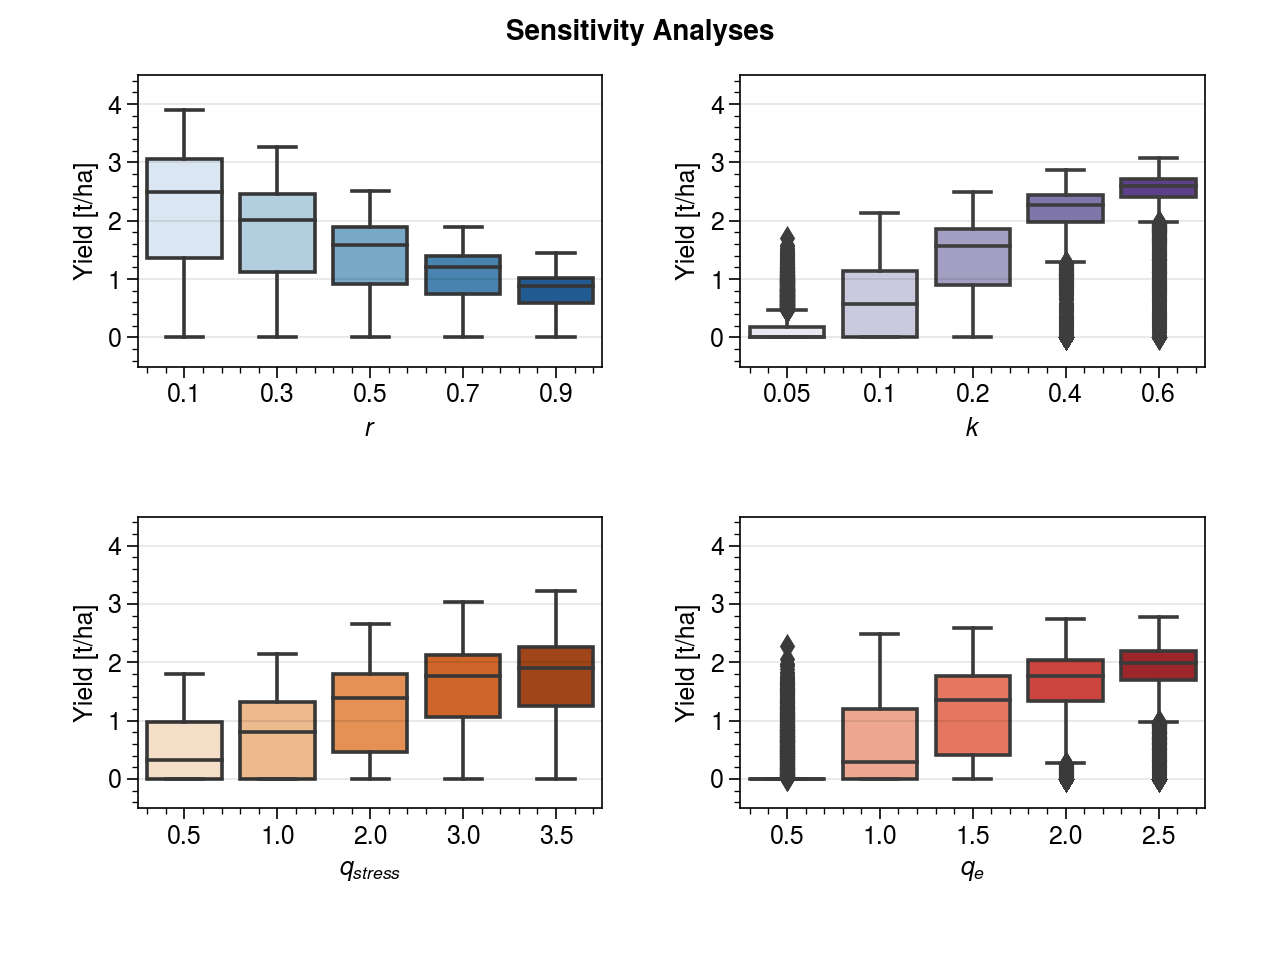

In [56]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.suptitle('Sensitivity Analyses',fontweight ="bold")

ax = sns.boxplot(x="R_PAR", y="Yield", data=r_test, orient='v', palette="Blues",
    ax=axes[0, 0])
axes[0, 0].set_xlabel('$\mathit{r}$')
axes[0, 0].set_ylim(-0.5,4.5)

ax = sns.boxplot(x="K_PAR", y="Yield", data=k_test, orient='v',  palette="Purples",
    ax=axes[0, 1])
axes[0, 1].set_xlabel('$\mathit{k}$')
axes[0, 1].set_ylim(-0.5,4.5)

ax = sns.boxplot(x="STRESS_PAR", y="Yield", data=stress_test, orient='v', palette="Oranges",
     ax=axes[1, 0]) # Not 100% sure aabout this tbh
axes[1, 0].set_xlabel('$\mathit{q_{stress}}$')
axes[1, 0].set_ylim(-0.5,4.5)

ax = sns.boxplot(x="Q_E_PAR", y="Yield", data=qe_test, orient='v', palette="Reds",
     ax=axes[1, 1])
axes[1, 1].set_xlabel('$\mathit{q_e}$')
axes[1, 1].set_ylim(-0.5,4.5)

axes[0, 0].set_ylabel('Yield [t/ha]')
axes[0, 1].set_ylabel('Yield [t/ha]')
axes[1, 0].set_ylabel('Yield [t/ha]')
axes[1, 1].set_ylabel('Yield [t/ha]')

fig.tight_layout(pad=3.0)

# ax1.title.set_text('First Plot')
# ax2.title.set_text('Second Plot')
# ax3.title.set_text('Third Plot')
# ax4.title.set_text('Fourth Plot')
#plt.savefig('../output/revisions/high-res-figures/figSI_sensitivity.png',dpi=300)

## 1.20 

Line 307-308: "calculate both leakage and evapotranspiration using the same s value and within the same time step" I don't think it is a top priority to change this here, but it may be worthwhile knowing that the way this is implemented can sometimes have pretty large impacts on leakage / ET partitioning. In particular, since leakage is a relatively fast process for recently wetted soils (time scales on the order of hours), I have previously found daily time steps bias the results towards too much leakage. Taking on a sub-daily time step (maybe 3 hrs) just for the sake of the leakage leads to seemingly better results. I think your surface layer size (400mm is relatively large for representing bare soil evap) probably helps to mitigate that by keeping saturation at more moderate values. But if this is not the case (if s is commonly close to 1), you might want to experiment with shorter time steps (even just pretending that precip is constant throughout the 24-hr day) to see if it effects your results. I'll leave this up to the authors' discretion and experience with their own model.


In [80]:
output[1]

,kc,LAI,stress,R,s,I,E,ET,T,L,dsdt,dos,doy
0,0.300000,0.75,1.0,0.000000,0.479920,0.0,0.148344,0.148344,0.0,0.0,-0.148344,1.0,60
1,0.300000,0.75,1.0,0.000000,0.479141,0.0,0.145460,0.145460,0.0,0.0,-0.145460,2.0,61
2,0.300000,0.75,1.0,0.000000,0.478377,0.0,0.142651,0.142651,0.0,0.0,-0.142651,3.0,62
3,0.300000,0.75,1.0,0.000000,0.477628,0.0,0.139914,0.139914,0.0,0.0,-0.139914,4.0,63
4,0.300000,0.75,1.0,0.000000,0.476893,0.0,0.137246,0.137246,0.0,0.0,-0.137246,5.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.655556,3.00,1.0,4.883138,0.494672,3.0,0.080741,0.080741,0.0,0.0,1.802397,176.0,235
176,0.641667,3.00,1.0,0.000000,0.504138,0.0,0.080135,0.080135,0.0,0.0,-0.080135,177.0,236
177,0.627778,3.00,1.0,0.000000,0.503718,0.0,0.079534,0.079534,0.0,0.0,-0.079534,178.0,237
178,0.613889,3.00,1.0,0.000000,0.503300,0.0,0.078940,0.078940,0.0,0.0,-0.078940,179.0,238


Text(0.5, 1.0, 'Saturation Histogram')

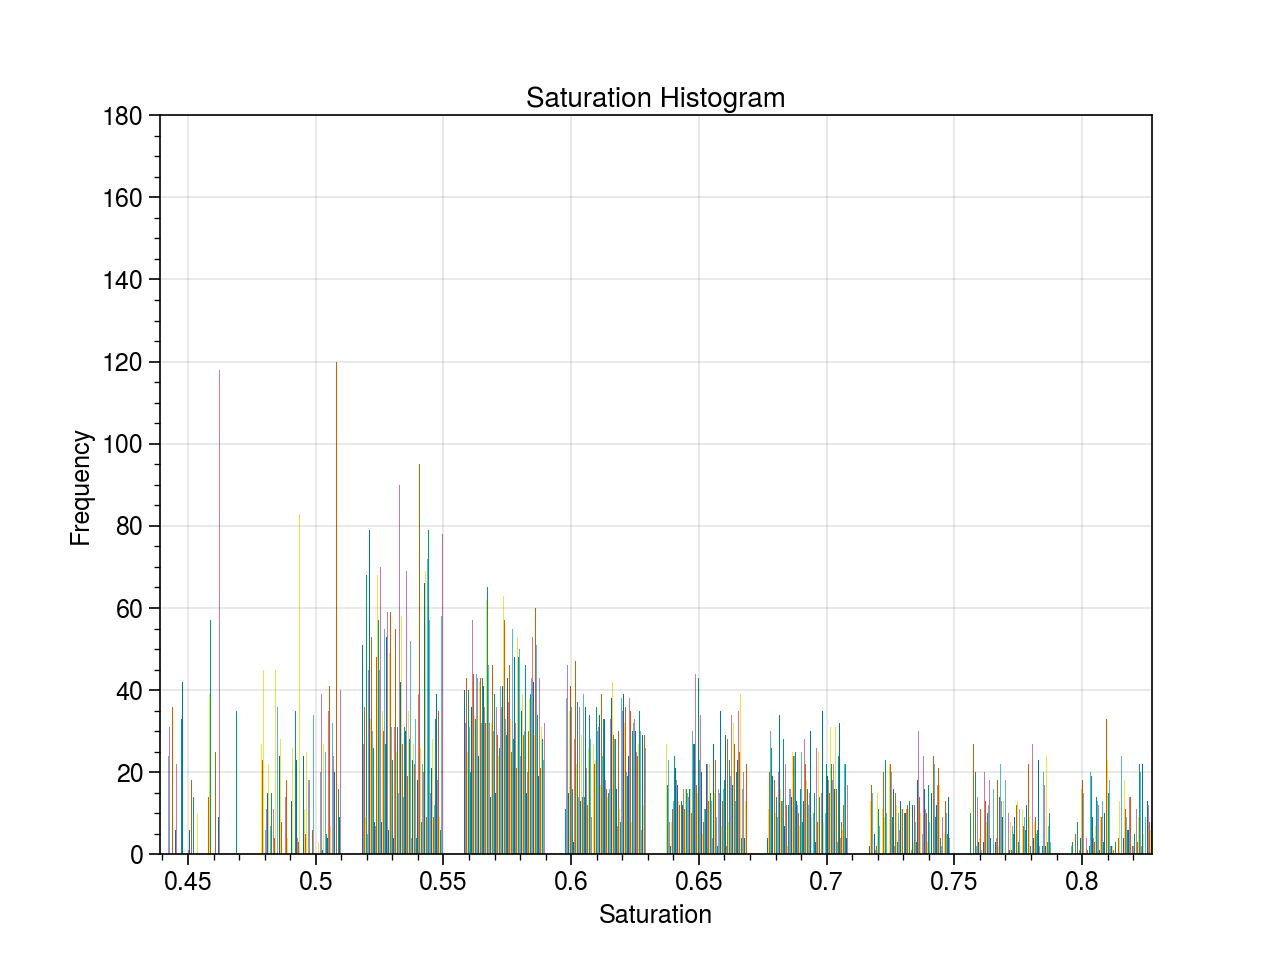

In [81]:
output

#output_orig
int_sums = []
for i in np.arange(0,len(output)):
    _s = output[i]['s']
    int_sums.append(_s)
    

In [84]:
int_sums[1]

0      0.479920
1      0.479141
2      0.478377
3      0.477628
4      0.476893
         ...   
175    0.494672
176    0.504138
177    0.503718
178    0.503300
179    0.502885
Name: s, Length: 180, dtype: float64

In [85]:
int_sums
df = pd.DataFrame(int_sums) # , columns = ['Value', 's']
_df = pd.melt(df)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
s,0.466256,0.465728,0.465208,0.464698,0.464196,0.463702,0.463217,0.462740,0.470621,0.470016,...,0.533366,0.532368,0.531480,0.530689,0.529984,0.529355,0.528731,0.528113,0.527500,0.526892
s,0.479920,0.479141,0.478377,0.477628,0.476893,0.476172,0.475465,0.474771,0.474090,0.473422,...,0.496470,0.496105,0.495743,0.495383,0.495027,0.494672,0.504138,0.503718,0.503300,0.502885
s,0.471414,0.470795,0.470187,0.469590,0.469003,0.468427,0.484212,0.483348,0.482501,0.481671,...,0.546753,0.568349,0.584975,0.578275,0.572321,0.567029,0.562322,0.558137,0.554414,0.551103
s,0.546677,0.543862,0.541197,0.538673,0.536283,0.534018,0.531872,0.597832,0.592139,0.586779,...,0.561921,0.557780,0.554097,0.550820,0.547904,0.545310,0.543001,0.540946,0.539117,0.537489
s,0.570745,0.566609,0.562704,0.559016,0.555532,0.552238,0.549123,0.546176,0.543387,0.540748,...,0.530472,0.529791,0.529164,0.528542,0.571727,0.566500,0.561852,0.557719,0.554042,0.550772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s,0.492682,0.491641,0.490623,0.489626,0.488650,0.487694,0.486759,0.485843,0.484945,0.484066,...,0.556229,0.584794,0.578115,0.572179,0.657006,0.642209,0.629087,0.617447,0.607116,0.597943
s,0.466256,0.465728,0.465208,0.464698,0.464196,0.463702,0.463217,0.462740,0.462270,0.461809,...,0.521146,0.520592,0.520042,0.519496,0.518955,0.518418,0.517885,0.517357,0.516833,0.516314
s,0.509728,0.508301,0.506907,0.505546,0.504217,0.502919,0.501651,0.500411,0.499200,0.498016,...,0.563019,0.629497,0.617810,0.607438,0.598230,0.590052,0.582787,0.626375,0.615040,0.604979
s,0.466256,0.465728,0.465208,0.464698,0.464196,0.463702,0.463217,0.462740,0.462270,0.461809,...,0.553270,0.550085,0.547250,0.544728,0.542483,0.540485,0.538707,0.537123,0.535714,0.534459


(0.3, 1)

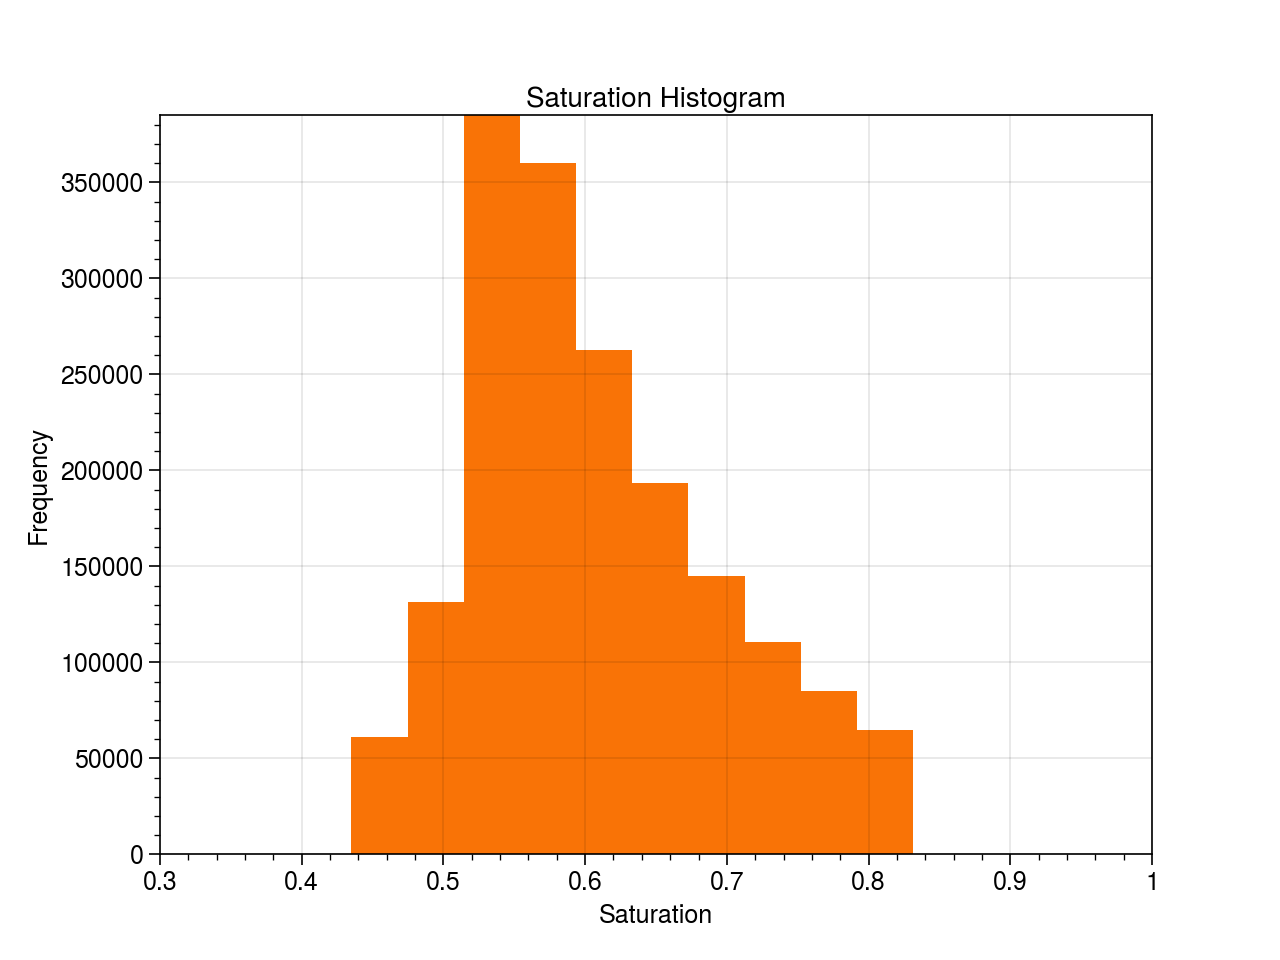

In [111]:
plt.hist(_df['value'], color='orange')
plt.xlabel('Saturation')
plt.ylabel('Frequency')
plt.title('Saturation Histogram')
plt.xlim(0.3,1)

In [94]:
output[1]

E_sums = []
for i in np.arange(0,len(output)):
    _E_sums = sum(output[i]['E'])
    E_sums.append(_E_sums)


In [95]:
output[1]

#output_orig
T_sums = []
for i in np.arange(0,len(output)):
    _T_sums = sum(output[i]['T'])
    T_sums.append(_T_sums)


In [96]:
output[1]

#output_orig
ET_sums = []
for i in np.arange(0,len(output)):
    _ET_sums = sum(output[i]['ET'])
    ET_sums.append(_ET_sums)


Text(0.5, 1.0, 'E and T fractions of ET Histogram')

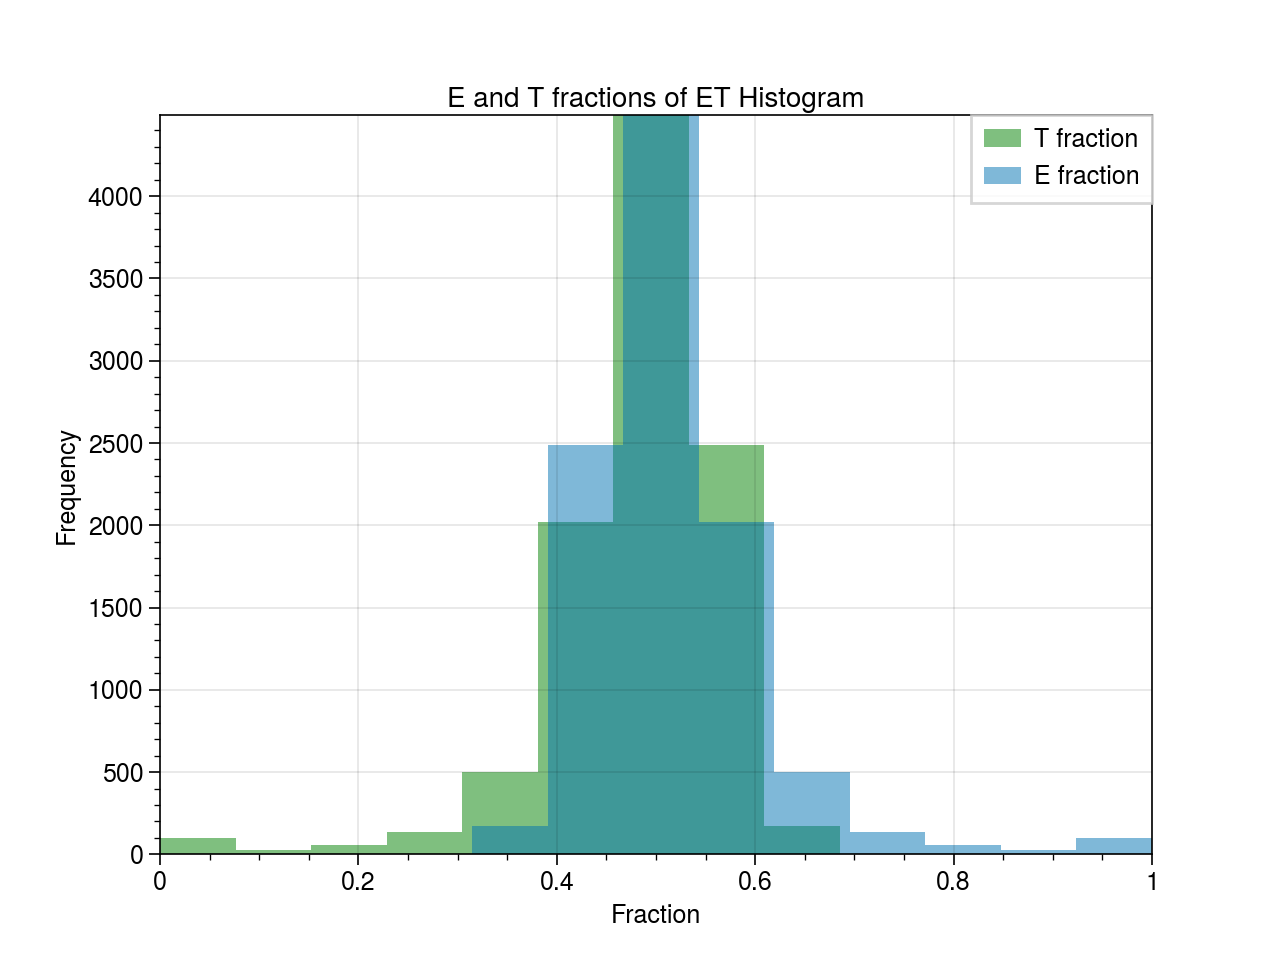

In [110]:
ET_df = pd.DataFrame({'T_sums': T_sums, 'E_sums': E_sums, 'ET_sums':ET_sums})
ET_df

ET_df['T_frac'] = ET_df['T_sums']/ET_df['ET_sums']
ET_df['E_frac'] = ET_df['E_sums']/ET_df['ET_sums']
ET_df['T_frac'].hist(alpha=0.5, label='T fraction', color='green')
ET_df['E_frac'].hist(alpha=0.5, label='E fraction')
plt.legend()
plt.xlabel('Fraction')
plt.ylabel('Frequency')
plt.title('E and T fractions of ET Histogram')

## 1.24 

Lines 398-405 (and Fig 7): While I recognize that you show seasonally-averaged static stress in Figure 7 so that you can show a time series, your actual crop-failure model is more complicated than that (Eqn 15). Could you add the pdf of dynamic stress as well so that we can see crop failure?

/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


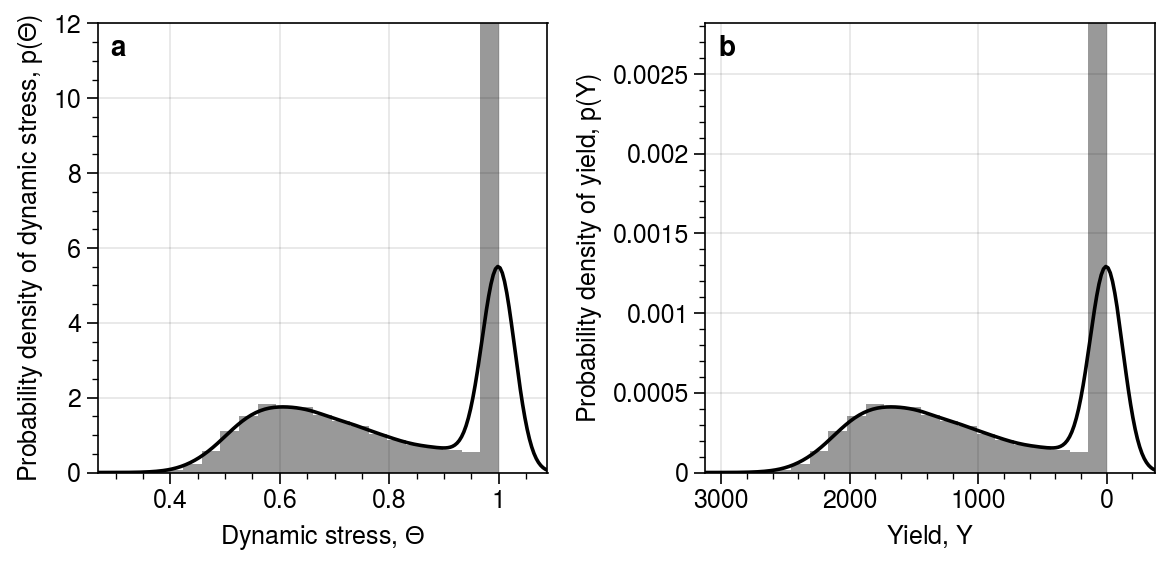

In [84]:
# Static stress vs. soil moisture
col = 'black'
f, axs = plot.subplots(nrows=1, ncols=2, share=0) # , journal='agu4'
axs.format(abc=True, abcloc='ul') 

# Dynamic stress distribution
data = [crop.calc_dstress(s=df.s, stress=df.stress) for df in output]
rf = [df['R'].sum() for df in output]
    
# Turn dynamic water stress data into a tuple
df = pd.DataFrame.from_records(data, columns =['AvgStress2','DynamicStress','Yield'])

# Plot 
sns.distplot(df['DynamicStress'], ax=axs[0], color=col,**{'kde': True, 'hist': True})
axs[0].format(ylabel='Probability density of dynamic stress, $p(\Theta)$') 
axs[0].format(xlabel='Dynamic stress, $\Theta$')
#axs.format(title='VWC vs. Static Stress')

sns.distplot(df['Yield'], ax=axs[1], color=col,**{'kde': True, 'hist': True})
axs[1].format(ylabel='Probability density of yield, $p(Y)$') 
axs[1].format(xlabel='Yield, $Y$')

#plt.savefig('../output/revisions/high-res-figures/figSI_sensitivity.png',dpi=300)

/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


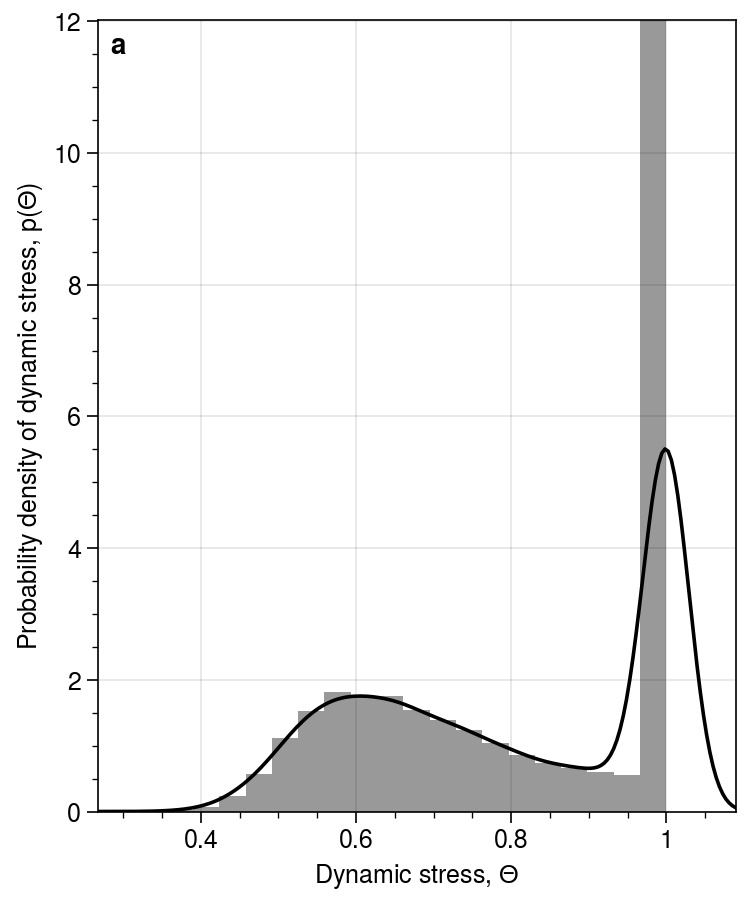

In [91]:
col = 'black'
f, axs = plot.subplots(nrows=1, ncols=1, share=0, journal='agu1') # , journal='agu4'
axs.format(abc=True, abcloc='ul') 

# Plot 
sns.distplot(df['DynamicStress'], ax=axs, color=col,**{'kde': True, 'hist': True})
axs.format(ylabel='Probability density of dynamic stress, $p(\Theta)$') 
axs.format(xlabel='Dynamic stress, $\Theta$')
#axs.format(title='VWC vs. Static Stress')

plt.savefig('../output/revisions/high-res-figures/figSI_theta.png',dpi=300)

## 2.8. 

Section 3.2, page 15, lines 398-405: the authors here highlight the inverse proportionality between soil moisture and static stress. As far as I am concerned, it would be quite interesting to plot the static stress against soil moisture. It could allow to see any hysteretic behavior, potentially due to the non-linearity of the model, or if a change in soil moisture immediately reflects in a static stress variation.

In [47]:
output[1]

,kc,LAI,stress,R,s,I,E,ET,T,L,dsdt,dos,doy
0,0.300000,0.75,0.430646,0.000000,0.539679,0.0,0.418736,0.465197,0.046461,0.0,-0.465197,1.0,60
1,0.300000,0.75,0.942949,0.000000,0.537236,0.0,0.405979,0.440712,0.034734,0.0,-0.440712,2.0,61
2,0.300000,0.75,0.961016,9.352900,0.534921,0.0,0.671972,0.931382,0.259411,0.0,8.421518,3.0,62
3,0.300000,0.75,0.645438,0.000000,0.579152,0.0,0.642140,0.878070,0.235930,0.0,-0.878070,4.0,63
4,0.300000,0.75,0.675418,0.000000,0.574540,0.0,0.614432,0.828227,0.213794,0.0,-0.828227,5.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.655556,3.00,0.623050,10.729688,0.582666,0.0,0.336553,2.429730,2.093176,0.0,8.299959,176.0,235
176,0.641667,3.00,0.378184,0.999484,0.626258,0.0,0.319388,2.268338,1.948950,0.0,-1.268854,177.0,236
177,0.627778,3.00,0.411680,0.000000,0.619594,0.0,0.292787,2.012997,1.720210,0.0,-2.012997,178.0,237
178,0.613889,3.00,0.467737,0.000000,0.609022,0.0,0.269834,1.787053,1.517218,0.0,-1.787053,179.0,238


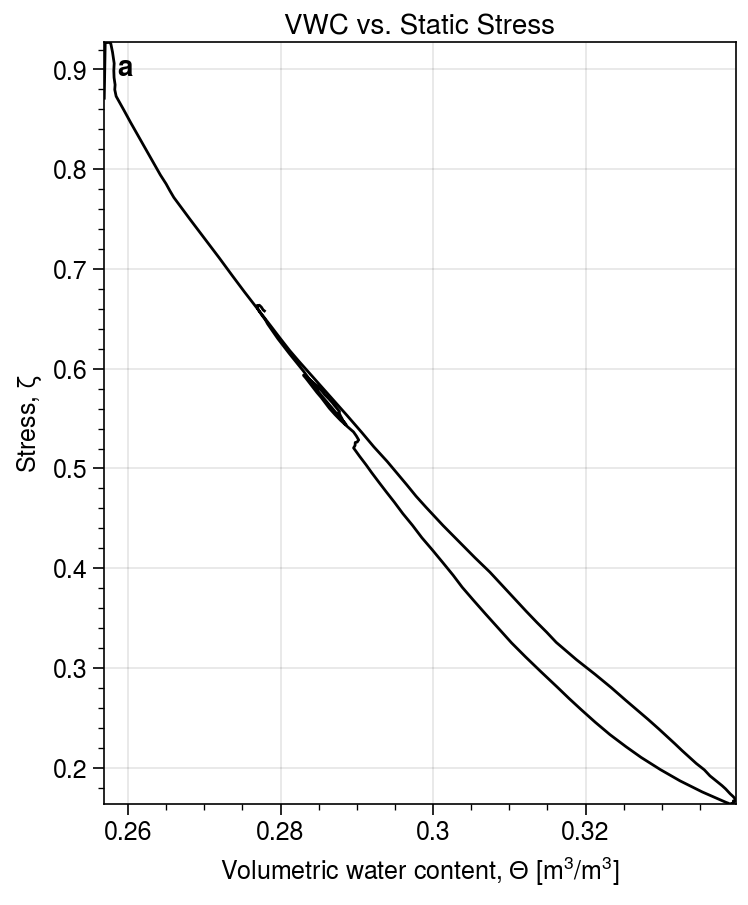

In [49]:
# Static stress vs. soil moisture
col = 'black'
f, axs = plot.subplots(nrows=1, ncols=1, share=0, journal='agu1')
axs.format(abc=True, abcloc='ul')

# Soil moisture time series
daily_s = pd.concat([df['s'] for df in output], axis=1)
daily_vwc = daily_s*Soil(texture).n
#daily_vwc_t = daily_vwc.T
avg_vwc = daily_vwc.mean(axis=1)
x = np.arange(60, len(avg_vwc)+60, 1)

# Stress time series
daily_stress = pd.concat([df['stress'] for df in output], axis=1)
#avg_daily_stress_t = avg_daily_stress.T
avg_stress = daily_stress.mean(axis=1)
avg_stress

# Plot
axs.plot(avg_vwc, avg_stress, color=col, lw=1)
axs.format(xlabel='Volumetric water content, $\Theta$ [m$^{3}/m^{3}$]')
axs.format(ylabel='Stress, $\zeta$')
axs.format(title='VWC vs. Static Stress')

## TODO

## 1.26 

Lines 426-436: What crop variety is used to determine this? Does this curve look different for different varieties? Is mean seasonal rainfall actually the main predictor still rather than some characteristic of when the rains fell?

In [68]:
result = pd.read_csv('../output/revisions/result.3.12.21.csv', sep=',').drop('Unnamed: 0', axis=1)


<ipython-input-69-8539f84eb886>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early['Yield_norm'] = early.Yield/max(early.Yield)
<ipython-input-69-8539f84eb886>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['Yield_norm'] = med.Yield/max(med.Yield)
<ipython-input-69-8539f84eb886>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

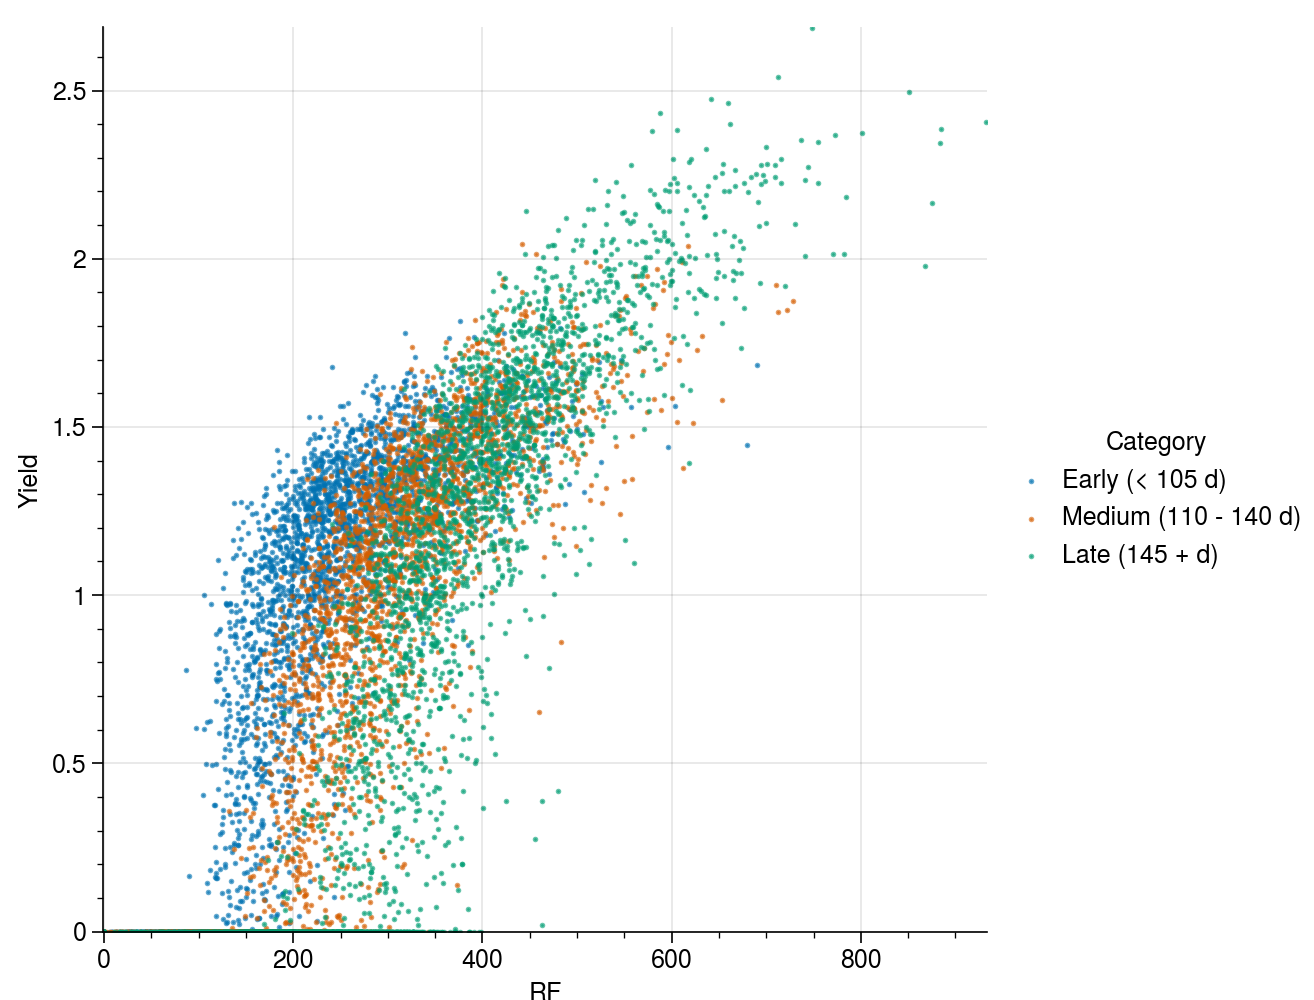

In [69]:
early = result.query("Category == 'Early (< 105 d)'")
med = result.query("Category == 'Medium (110 - 140 d)'")
late = result.query("Category == 'Late (145 + d)'")

early['Yield_norm'] = early.Yield/max(early.Yield)
med['Yield_norm'] = med.Yield/max(med.Yield)
late['Yield_norm'] = late.Yield/max(late.Yield)

sns.lmplot('RF', 'Yield', data=result, hue='Category', fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6})


/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

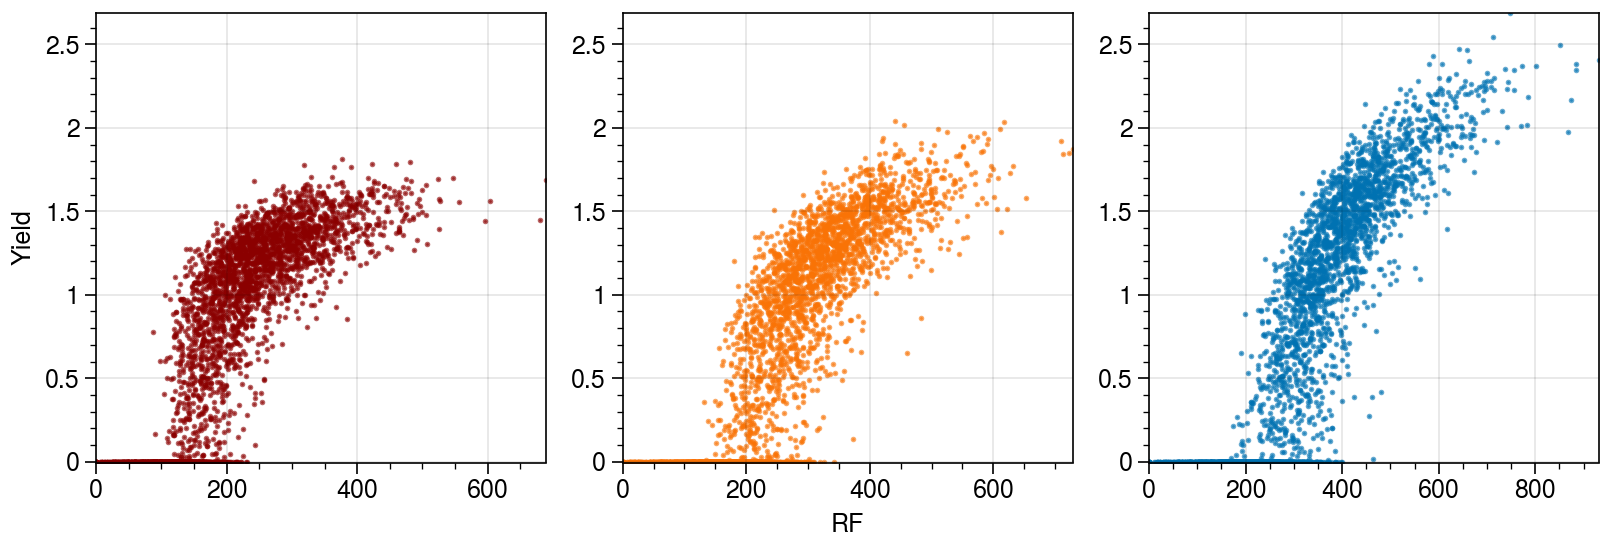

In [65]:
col = 'black'
f, (ax1, ax2, ax3) = plot.subplots(nrows=1, ncols=3, sharey=2) # , journal='agu4'
#axs.format(abc=True, abcloc='ul') 
sns.regplot('RF', 'Yield', data=early, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, ax=ax1,color='darkred')
sns.regplot('RF', 'Yield', data=med, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, ax=ax2, color='orange')
sns.regplot('RF', 'Yield', data=late, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, ax=ax3, label='late')

labels = ['early', 'medium','ate']
#ax3.legend(loc='upper left', frameon=False)
#ax1.legend()

/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


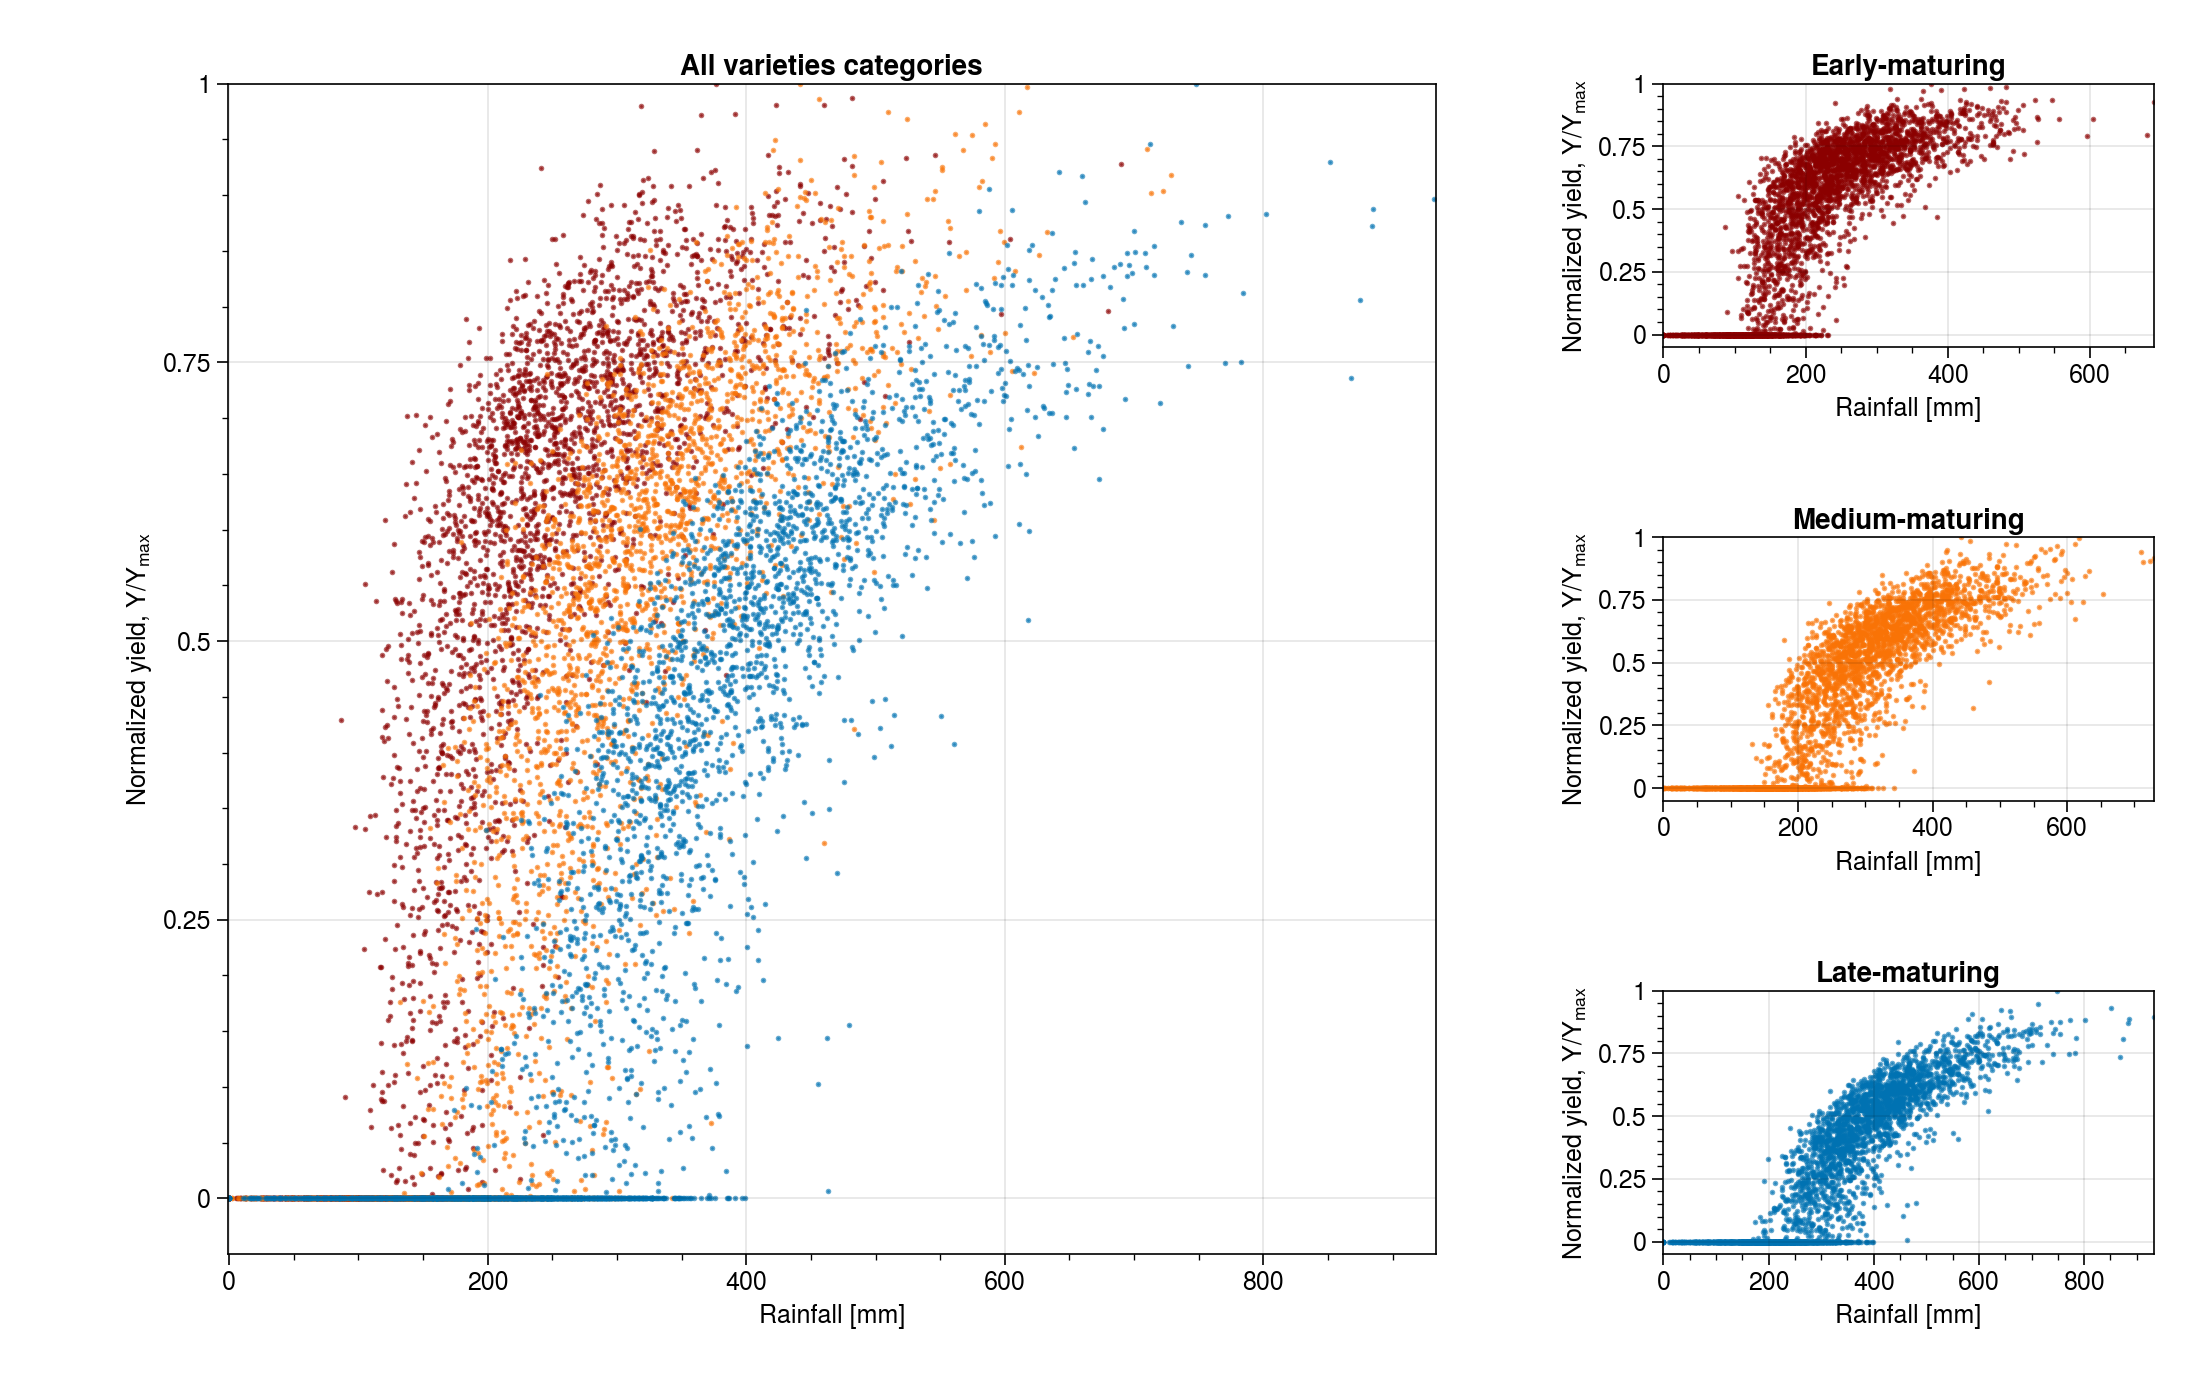

In [75]:
# Plot figure with subplots of different sizes
import matplotlib.gridspec as gridspec
%matplotlib inline

fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(3,3)

# large subplot
plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
#sns.lmplot('RF', 'Yield', data=result, hue='Category', fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, legend=False)
sns.regplot('RF', 'Yield_norm', data=early, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, color='darkred')
sns.regplot('RF', 'Yield_norm', data=med, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, color='orange')
sns.regplot('RF', 'Yield_norm', data=late, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6},label='late')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.ylim(-.05,1)
plt.title('All varieties categories', fontweight='bold')
plt.xlabel('Rainfall [mm]')
plt.ylabel('Normalized yield, $Y/Y_{max}$ ')
#plt.legend()

# small subplot 1
plt.subplot2grid((3,3), (0,2))
sns.regplot('RF', 'Yield_norm', data=early, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, color='darkred')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.ylim(-.05,1)
plt.title('Early-maturing', fontweight='bold')
plt.xlabel('Rainfall [mm]')
plt.ylabel('Normalized yield, $Y/Y_{max}$ ')

# small subplot 2
plt.subplot2grid((3,3), (1,2))
sns.regplot('RF', 'Yield_norm', data=med, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6}, color='orange')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.ylim(-.05,1)
plt.title('Medium-maturing', fontweight='bold')
plt.xlabel('Rainfall [mm]')
plt.ylabel('Normalized yield, $Y/Y_{max}$ ')

# small subplot 3
plt.subplot2grid((3,3), (2,2))
sns.regplot('RF', 'Yield_norm', data=late, fit_reg=False, scatter_kws={'s': 1, 'alpha': 0.6},label='late')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.ylim(-.05,1)
plt.title('Late-maturing', fontweight='bold')
plt.xlabel('Rainfall [mm]')
plt.ylabel('Normalized yield, $Y/Y_{max}$ ')

# fit subplots and save fig
fig.tight_layout()
fig.set_size_inches(w=11,h=7)
fig_name = '../output/high-res-figures-2/figSI_culti.png'
fig.savefig(fig_name)

## 1.46 

Line 427: "polynomial function with order less than 1" is a maybe an atypical description. "Power law" relation with order less than 1 maybe? Or concave / asymptotic / sigmoidal?

2.9320620093414056


/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


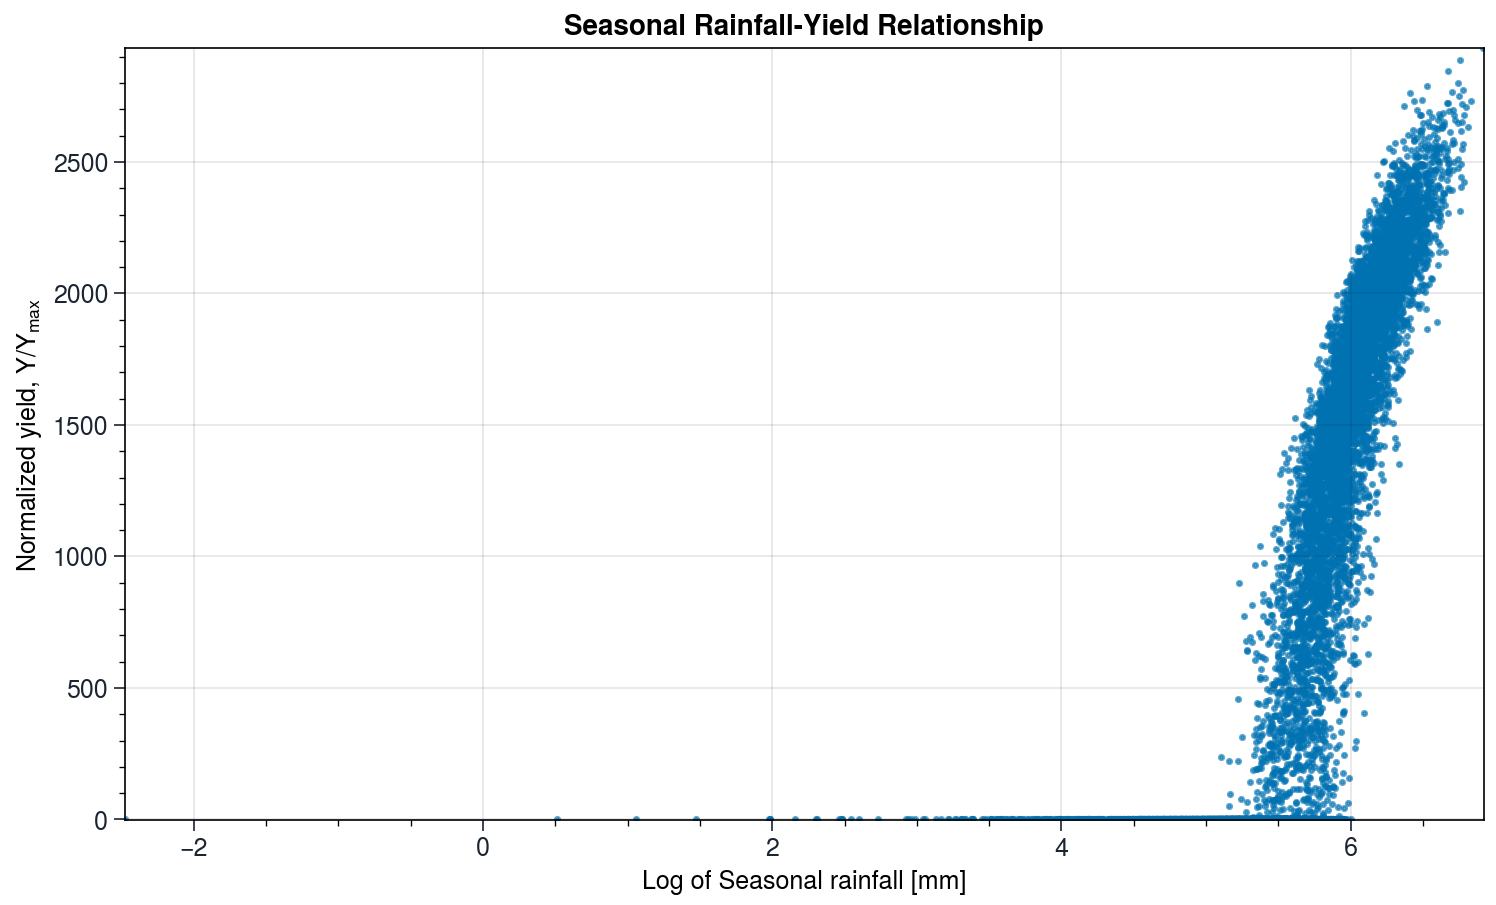

In [29]:
# Figure 8. Dynamic Stress-Rainfall-Yield Relationship

# line up the data
data = [crop.calc_dstress(s=df.s, stress=df.stress) for df in output]
rf = [df['R'].sum() for df in output]
    
# Turn dynamic water stress data into a tuple
df = pd.DataFrame.from_records(data, columns =['AvgStress2','DynamicStress','Yield'])
df['RF'] = rf
print(max(df.Yield)/1000)

# Dynamic Stress Yield Rlxn

def fig8(df=None):
    # We'll be using these variables a lot
    
    #dfno0 = df[(df != 0).all(1)]
    #x = dfno0.RF
    #y = dfno0.Yield

    x = df.RF
    y = df.Yield
    # Y axis can either be nornalized yield or yield
    #dfno0['Yield_norm'] = dfno0.Yield/max(dfno0.Yield)
    df['Yield_norm'] = df.Yield/max(df.Yield)
    
    f, axs = plot.subplots(journal='agu2') #, tight=False
    axs.format(
        abc=False, abcloc='ul', suptitle='Seasonal Rainfall-Yield Relationship')
    
    cols = 'dark'
    
    plt.scatter(np.log(x), y, alpha=0.6, size=2.5) # , color='blue' # , color='black'
    #plt.ylim(-.05,1.05)
    plt.ylabel('Normalized yield, $Y/Y_{max}$ ') # Yield normalized by max. yield
    plt.xlabel('Log of Seasonal rainfall [mm]')
    #plt.savefig('../output/high-res-figures/fig8_dyn-stress.png',format='png',dpi=300)
    #plt.savefig('../output/high-res-figures/fig8_dyn-stress.pdf')
    
    axs.tick_params(axis='y', colors=cols)
    axs.tick_params(axis='x', colors=cols)
    
fig8(df=df)